
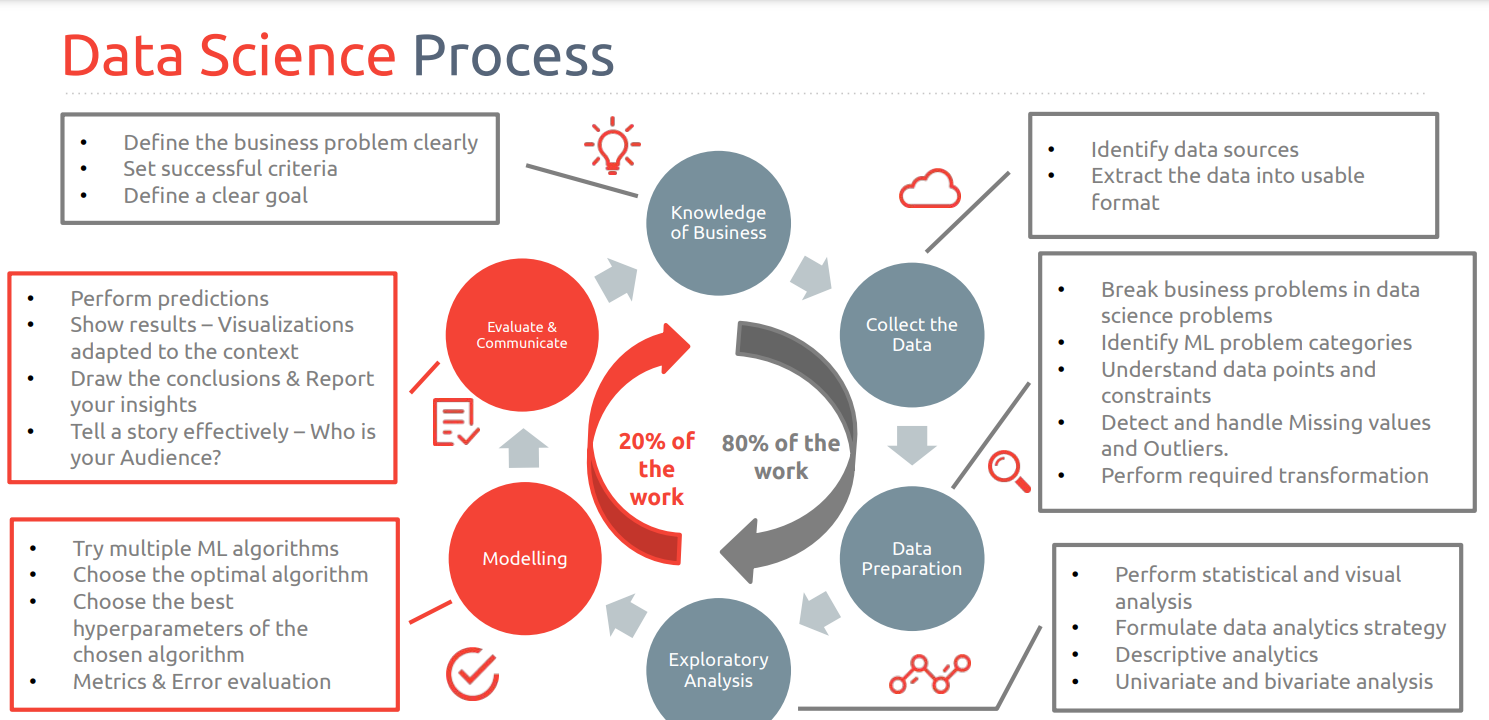

# **Problem Description**

Hello,
 
Over the past year or so Credit One has seen an increase in the number of customers who have defaulted on loans they have secured from various partners, and Credit One, as their credit scoring service, could risk losing business if the problem is not solved right away. The bottom line is they need a much better way to understand how much credit to allow someone to use or, at the very least, if someone should be approved or not. They have enlisted the help of our Data Science team to design and implement a creative, empirically sound solution. It is very important that we all understand from the start that this is not a typical data analytics problem as we have been given full authority to solve this problem with whatever tools and methods we need. As such we've elected to use Python and a few different libraries to do the heavy lifting for us. We'll be using a few main libraries for the bulk of our work, but you should not limit yourselves to only using those - feel free to investigate other libraries if you think they will contribute to the best solution. 
 
Our first need is to define the problem within a data science framework and understand the differences between what we have been doing with data analytics and what we're going to be doing in this project with data science. Then, you'll use your local programming environment to do your work without needing to be in one space or another to have access to the tools you need, before finally starting the analysis and solving this problem. They will be providing the data that you'll be using for this task so you may use it to focus on understating the problem and getting your environment ready for the task soon. I'll be expecting a report on your experience and understanding of the problem in a few days.

## Investigative Questions:

Working with Credit One Data


Now that you have established your process, you're ready to begin your work by preparing and exploring the data. Before we dive in lets review some notes about the project:

Problem:
**Increase in customer default rates**


- This is bad for Credit One since we approve the customers for loans in the first place. Revenue and customer loss for clients and, eventually, loss of clients for Credit One

___

Investigative Questions:

- **How do you ensure that customers can/will pay their loans? Can we do this?**

As you progress through the tasks at hand, begin thinking about how to solve this problem. Here are some lessons we learned form a similar problem we addressed last year:

- We cannot control customer spending habits
---

- We cannot always go from what we find in our analysis to the underlying "why"

---

- We must focus on the problem(s) we can solve: What attributes in the data can we deem to be statistically significant to the problem at hand?

---

- What concrete information can we derive from the data we have?

---

- What proven methods can we use to uncover more information and why?


I'll be expecting a report on your experience in a few days.

 
Thanks,
 
GR
 

## Variables

- ID: ID of each client

---

- Limit_Balance: Amount of given credit in NT dollars (includes individual and family/supplementary credit

---

- SEX: Gender (1=male, 2=female)

- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

- MARRIAGE: Marital status (1=married, 2=single, 3=others, 0=others)

- AGE: Age in years

---

- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

- PAY_2: Repayment status in August, 2005 (scale same as above)

- PAY_3: Repayment status in July, 2005 (scale same as above)

- PAY_4: Repayment status in June, 2005 (scale same as above)

- PAY_5: Repayment status in May, 2005 (scale same as above)

- PAY_6: Repayment status in April, 2005 (scale same as above)

---

- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

---

- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
 
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

---

- default.payment.next.month: Default payment (1=yes, 0=no)

##  Libraries

In [1]:
#imports
#numpy, pandas, scipy, math, matplotlib, dora, seaborn
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from Dora import Dora
import scipy 
from math import sqrt

#estimators
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.svm import SVR

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from sklearn import metrics

## Importing Dataset

##### Uploading dataset

In [2]:
import warnings
warnings.filterwarnings("ignore")
connection = pymysql.connect(host='data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com',
                             user='deepAnalytics',
                             password='Sqltask1234!',
                             database='Credit',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

In [3]:
df0 = pd.read_sql('SELECT * FROM credit', con=connection)

In [4]:
df0.to_csv("M2creditData.csv",index=False)

##### Write df to csv

In [5]:
df = df0.copy()
df.head(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default


# **Data Cleaning and Preprocessing**

## Consistency Check 

In [6]:
#### Quick glance of the dataset

df.T.head(30)

,0,1,2,3,4,5,6,7,8,9,...,3660,3661,3662,3663,3664,3665,3666,3667,3668,3669
X1,LIMIT_BAL,20000,120000,90000,50000,50000,50000,500000,100000,140000,...,380000,50000,150000,220000,80000,220000,70000,120000,180000,50000
X2,SEX,female,female,female,female,male,male,male,female,female,...,male,male,female,male,female,female,female,male,female,female
X3,EDUCATION,university,university,university,university,university,graduate school,graduate school,university,high school,...,university,university,high school,university,other,university,university,university,university,high school
X4,MARRIAGE,1,2,2,1,1,2,2,2,1,...,1,1,1,2,2,1,2,2,2,1
X5,AGE,24,26,34,37,57,37,29,23,28,...,50,44,43,29,27,32,34,37,32,57
X6,PAY_0,2,-1,0,0,-1,0,0,0,0,...,0,0,-1,0,0,0,1,-1,0,0
X7,PAY_2,2,2,0,0,0,0,0,-1,0,...,0,0,-1,0,0,0,2,2,0,0
X8,PAY_3,-1,0,0,0,-1,0,0,-1,2,...,0,0,2,0,0,0,2,0,0,0
X9,PAY_4,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
X10,PAY_5,-2,0,0,0,0,0,0,0,0,...,0,0,-1,0,0,0,0,0,0,0


As we can observe, the first row is the same as our header, so I'll proceed to drop it: 

In [7]:
df.drop(index=df.index[0], axis=0, inplace=True)

In [8]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665,220000,female,university,1,32,0,0,0,0,0,...,208355,213015,217475,7200,9000,10000,8000,8010,8500,not default
3666,70000,female,university,2,34,1,2,2,2,0,...,26456,28361,31873,1500,2900,0,2500,4000,0,not default
3667,120000,male,university,2,37,-1,2,0,0,0,...,17901,19608,19143,1000,1600,800,2000,0,1600,default
3668,180000,female,university,2,32,0,0,0,0,0,...,31057,29052,25933,1582,30000,1000,1000,1000,1000,not default


### Duplicate Check

In [9]:
# checking for duplicates
duplicates= df.duplicated()

# printing the number of duplicates
print('Number of duplicates:', duplicates.sum())

# removing duplicates
df = df.drop_duplicates()

# printing the new number of rows
print('Number of rows after removing duplicates:', len(df))

Number of duplicates: 1272
Number of rows after removing duplicates: 2397


### Missing Values Check

In [10]:
print(df.isnull().sum())

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64


There are no missing values in our dataset

## **Feature Engineering**

**Resetting index and dropping last row**

In [11]:
df.reset_index(inplace= True, drop=True)
df = df.drop(index=df.index[-1])

### Renaming Column Names 

In [12]:
df = df.rename(columns={'X1': 'Limit_Balance', 'X2': 'Sex', 'X3': 'Education', 'X4': 'Civil_Status', 'X5' : 'Age', 'X6': 'Payment_1', 'X7': 'Payment_2', 'X8':'Payment_3', 'X9':'Payment_4', 'X10':'Payment_5', 'X11':'Payment_6', 'X12':'Bill_Amount1', 'X13':'Bill_Amount2', 'X14':'Bill_Amount3', 'X15':'Bill_Amount4', 'X16':'Bill_Amount5', 'X17':'Bill_Amount6', 'X18':'Pay_Amount1', 'X19':'Pay_Amount2', 'X20':'Pay_Amount3', 'X21':'Pay_Amount4', 'X22':'Pay_Amount5', 'X23':'Pay_Amount6', 'Y':'Outcome'})

### Variable transformation

In [13]:
df['Sex_ID'] = df['Sex'].map({'female':0, 'male': 1})
df['Education_ID'] = df['Education'].map({'high school':1, 'graduate school': 2, 
                                          'university':3, 'other':4})
df['Outcome_ID'] = df['Outcome'].map({'default':1, 'not default': 0})
df['Civil Status'] = df['Civil_Status'].map({'1':'Married', '2': 'Single', 
                                          '3':'Others', '0':'Unknown'})

In [14]:
df = df.rename(columns={'Civil Status': 'Civil_Status', 'Civil_Status': 'Civil_Status_ID'})

In [15]:
df.Sex.replace({'female':'Female', 'male':'Male'}, inplace=True)
df.Education.replace({'university':'University', 'graduate school':'Graduate School',
                      'high school': 'High School', 'other':'Other'}, inplace=True)
df.Outcome.replace({'not default':'Not Default', 'default':'Default'}, inplace=True)

Encoding categorical variables to numerical variables is important for several reasons:

- **Analysis and modeling:** Many data analysis and modeling techniques require numerical input data. For example, regression models, decision trees, and neural networks require numerical input variables. By encoding categorical variables into numerical variables, you can use them as input data for these models.

---


- **Visualization:** Many visualization tools and libraries are designed to work with numerical data. By encoding categorical variables into numerical variables, you can create visualizations that help you better understand the data and identify patterns and relationships between variables.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Limit_Balance    2396 non-null   object
 1   Sex              2396 non-null   object
 2   Education        2396 non-null   object
 3   Civil_Status_ID  2396 non-null   object
 4   Age              2396 non-null   object
 5   Payment_1        2396 non-null   object
 6   Payment_2        2396 non-null   object
 7   Payment_3        2396 non-null   object
 8   Payment_4        2396 non-null   object
 9   Payment_5        2396 non-null   object
 10  Payment_6        2396 non-null   object
 11  Bill_Amount1     2396 non-null   object
 12  Bill_Amount2     2396 non-null   object
 13  Bill_Amount3     2396 non-null   object
 14  Bill_Amount4     2396 non-null   object
 15  Bill_Amount5     2396 non-null   object
 16  Bill_Amount6     2396 non-null   object
 17  Pay_Amount1      2396 non-null   

### Reordering Columns

In [17]:
df = df[['Outcome', 'Outcome_ID','Sex', 'Sex_ID', 'Education', 'Education_ID', 'Civil_Status', 'Civil_Status_ID',
       'Age', 'Limit_Balance', 'Payment_1', 'Payment_2', 'Payment_3', 'Payment_4', 'Payment_5', 'Payment_6', 
       'Bill_Amount1', 'Bill_Amount2','Bill_Amount3', 'Bill_Amount4','Bill_Amount5', 'Bill_Amount6', 
       'Pay_Amount1', 'Pay_Amount2', 'Pay_Amount3', 'Pay_Amount4', 'Pay_Amount5', 'Pay_Amount6']]

### Changing variable types 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Outcome          2396 non-null   object
 1   Outcome_ID       2396 non-null   int64 
 2   Sex              2396 non-null   object
 3   Sex_ID           2396 non-null   int64 
 4   Education        2396 non-null   object
 5   Education_ID     2396 non-null   int64 
 6   Civil_Status     2396 non-null   object
 7   Civil_Status_ID  2396 non-null   object
 8   Age              2396 non-null   object
 9   Limit_Balance    2396 non-null   object
 10  Payment_1        2396 non-null   object
 11  Payment_2        2396 non-null   object
 12  Payment_3        2396 non-null   object
 13  Payment_4        2396 non-null   object
 14  Payment_5        2396 non-null   object
 15  Payment_6        2396 non-null   object
 16  Bill_Amount1     2396 non-null   object
 17  Bill_Amount2     2396 non-null   

In [19]:
df = df.astype({"Limit_Balance":'float', "Civil_Status_ID":'int', 'Age':'int', 
                "Payment_1":'int', "Payment_2":'int', "Payment_3":'int', 
                "Payment_4":'int', "Payment_5":'int', "Payment_6":'int', 
                'Bill_Amount1':'int', "Bill_Amount2":'int', 'Bill_Amount3':'int', 
                'Bill_Amount4':'int', 'Bill_Amount5':'int', 
                'Bill_Amount6':'int', 'Pay_Amount1':'int', 'Pay_Amount2':'int', 
                'Pay_Amount3':'int', 'Pay_Amount4':'int', 
                'Pay_Amount5':'int', 'Pay_Amount6':'int'})

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Outcome          2396 non-null   object 
 1   Outcome_ID       2396 non-null   int64  
 2   Sex              2396 non-null   object 
 3   Sex_ID           2396 non-null   int64  
 4   Education        2396 non-null   object 
 5   Education_ID     2396 non-null   int64  
 6   Civil_Status     2396 non-null   object 
 7   Civil_Status_ID  2396 non-null   int64  
 8   Age              2396 non-null   int64  
 9   Limit_Balance    2396 non-null   float64
 10  Payment_1        2396 non-null   int64  
 11  Payment_2        2396 non-null   int64  
 12  Payment_3        2396 non-null   int64  
 13  Payment_4        2396 non-null   int64  
 14  Payment_5        2396 non-null   int64  
 15  Payment_6        2396 non-null   int64  
 16  Bill_Amount1     2396 non-null   int64  
 17  Bill_Amount2  

### Binarizing Numerical Variables

In [21]:
df["Limit_Balance_Cat"] = pd.cut(x=df['Limit_Balance'], bins=[0.000000, 50000.000000, 140000.000000, 230000.000000, 1000000.000000], 
                         labels=["Low", "Medium", "Medium+", "High"], ordered=False)
df["Age_Cat"] =pd.cut(x=df['Age'], bins=[20, 30, 40, 50, 60, 70, 80], 
                         labels=["20-29", "30-39", "40-49", 
                                 "50-59", "60-69", "70-79"], ordered=False)

## **Creation of New Variables**

### Creating Mean Variables for Payment_Amount and Bill_Amount Numerical and Payment_Status

In [22]:
df['Mean_Payment_Amount'] = df[['Pay_Amount1', 'Pay_Amount2','Pay_Amount3',
                               'Pay_Amount4', 'Pay_Amount5', 'Pay_Amount6']].mean(axis=1)
df['Mean_Bill_Amount'] = df[['Bill_Amount1', 'Bill_Amount2','Bill_Amount3',
                               'Bill_Amount4', 'Bill_Amount5', 'Bill_Amount6']].mean(axis=1)

df['Mean_Payment_Status'] = df[['Payment_1', 'Payment_2','Payment_3',
                               'Payment_4', 'Payment_5', 'Payment_6']].mean(axis=1)


### Montly Consumption

In [23]:
df["Consumption_September"]=df["Bill_Amount2"] - (df["Bill_Amount1"] - df["Pay_Amount1"])

df["Consumption_August"]=df["Bill_Amount3"] - (df["Bill_Amount2"] - df["Pay_Amount2"])

df["Consumption_July"]=df["Bill_Amount4"] - (df["Bill_Amount3"] - df["Pay_Amount3"])

df["Consumption_June"]=df["Bill_Amount5"] - (df["Bill_Amount4"] - df["Pay_Amount4"])

df["Consumption_May"]=df["Bill_Amount6"] - (df["Bill_Amount5"] - df["Pay_Amount5"])

In [24]:
df['Mean_Consumption_Amount'] = df[['Consumption_September', 'Consumption_August','Consumption_July',
                               'Consumption_June', 'Consumption_May']].mean(axis=1)

### Mean Consumption > and < Mean_Payment_Amount

In [25]:
df["Consumption>Pay"] = (df["Mean_Consumption_Amount"] > df["Mean_Payment_Amount"]).astype(int)
df.loc[df["Mean_Consumption_Amount"] < df["Mean_Payment_Amount"], "Consumption>Pay"] = 0

### Mean Bill Amount > and <  Limit Balance

In [26]:
df["Bill_Amount>Limit_Balance"] = (df["Mean_Bill_Amount"] > df["Limit_Balance"]).astype(int)
df.loc[df["Mean_Bill_Amount"] < df["Limit_Balance"], "Bill_Amount>Limit_Balance"] = 0

### Positive Payment_Status throughout all 6 months 

In [27]:
df["Constant_Delay_Payment_Status"] = 0
df.loc[(df["Payment_1"] < 0) & (df["Payment_2"] < 0) & (df["Payment_3"] < 0) & (df["Payment_4"] < 0) & (df["Payment_5"] < 0) & (df["Payment_6"] < 0), "Constant_Delay_Payment_Status"] = 1

### Client Class

**Master**

In [28]:
clients_master = df.loc[(df["Payment_1"] <= 0) & (df["Payment_2"] <= 0) & (df["Payment_3"] <= 0) & (df["Payment_4"] <= 0) & (df["Payment_5"] <= 0) & (df["Payment_6"] <= 0) & (df["Outcome_ID"]== 0)]

**Super**

In [29]:
clients_super = df.loc[(df["Mean_Consumption_Amount"] >= df["Mean_Payment_Amount"]) & (df["Outcome_ID"]== 0)]

**A Clients**

In [30]:
a_clients = df.loc[(df["Mean_Consumption_Amount"] <= df["Mean_Payment_Amount"]) & (df["Outcome_ID"]== 0)]

**B Clients**

In [31]:
b_clients = df.loc[(df["Mean_Consumption_Amount"] <= df["Mean_Payment_Amount"]) & (df["Outcome_ID"]== 1)]

**C Clients**

In [32]:
c_clients = df.loc[(df["Outcome_ID"]== 1)]

**D Clients**

In [33]:
d_clients = df.loc[(df["Mean_Consumption_Amount"] >= df["Mean_Payment_Amount"]) & (df["Outcome_ID"]== 1)]

**E Clients**

In [34]:
e_clients = df.loc[(df["Mean_Consumption_Amount"] >= df["Mean_Payment_Amount"]) & 
                   (df["Outcome_ID"] == 1) & 
                   (df["Payment_1"].astype(int) > 0) & 
                   (df["Payment_2"].astype(int) > 0) & 
                   (df["Payment_3"].astype(int) > 0) & 
                   (df["Payment_4"].astype(int) > 0) & 
                   (df["Payment_5"].astype(int) > 0) & 
                   (df["Payment_6"].astype(int) > 0) & 
                   (df["Outcome_ID"] == 1)]


In [35]:
for i in range(0, len(df)):
    if i in e_clients.index:
        df.loc[i, "class"] = "E"
    elif i in d_clients.index:
        df.loc[i, "class"] = "D"    
    elif i in c_clients.index:
        df.loc[i, "class"] = "C"
    elif i in a_clients.index:
        df.loc[i, "class"] = "A"
    elif i in clients_super.index:
        df.loc[i, "class"] = "S"
           

In [36]:
df["class"].unique()

array(['C', 'A', 'S', 'D', 'E'], dtype=object)

In [37]:
class_dummies = pd.get_dummies(df['class'], prefix='class')

# Merge the dummy variables back to the original DataFrame
df = pd.concat([df, class_dummies], axis=1)

# Exploratory Data Analysis

## **Univariate Analysis**

### **Outcome Distribution**

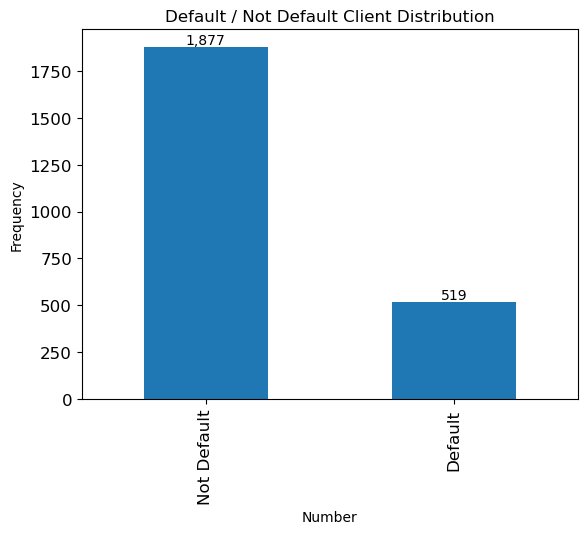

Not Default    1877
Default         519
Name: Outcome, dtype: int64

In [38]:
outcome_counts = df['Outcome'].value_counts().sort_values(ascending=False)

outcome_counts.plot.bar()
plt.title('Default / Not Default Client Distribution')
plt.xlabel('Number')
plt.ylabel('Frequency')

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

for i, val in enumerate(outcome_counts):
    plt.annotate(f"{val:,}", xy=(i, val), va="bottom", ha="center", fontsize=10)
    
plt.show()

outcome_counts

### Limit Balance Distribution

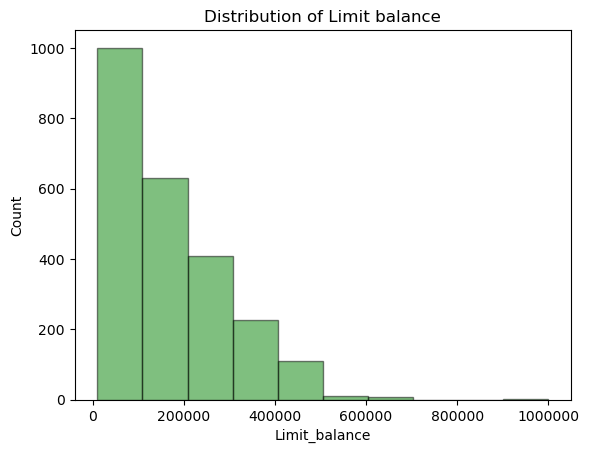

In [39]:
import matplotlib.pyplot as plt

plt.hist(df['Limit_Balance'], bins=10, color='green', edgecolor='black', alpha=0.5)
plt.title('Distribution of Limit balance')
plt.xlabel('Limit_balance')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

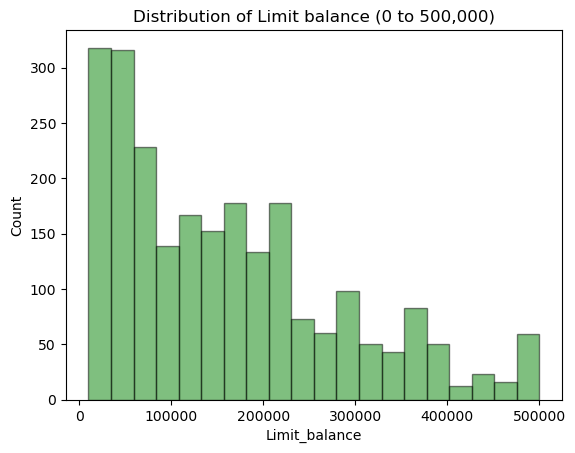

In [40]:
mask = (df['Limit_Balance'] >= 0) & (df['Limit_Balance'] <= 500000)

# filter the data using the mask
filtered_data = df.loc[mask, 'Limit_Balance']

# create the histogram
plt.hist(filtered_data, bins=20, color='green', edgecolor='black', alpha=0.5)

# set the plot title and axis labels
plt.title('Distribution of Limit balance (0 to 500,000)')
plt.xlabel('Limit_balance')
plt.ylabel('Count')

# format the x-axis tick labels
plt.ticklabel_format(style='plain', axis='x')

# show the plot
plt.show()

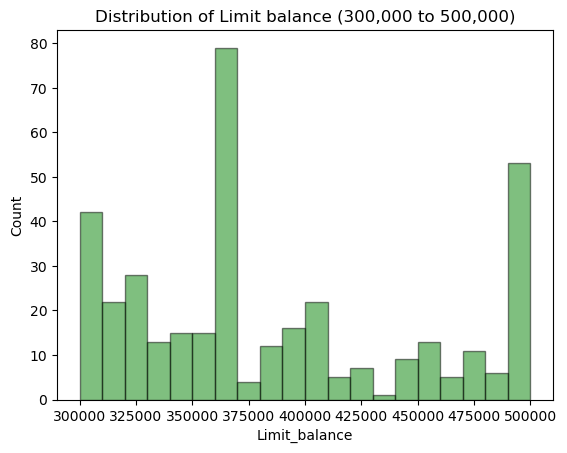

In [41]:
mask = (df['Limit_Balance'] >= 300000) & (df['Limit_Balance'] <= 500000)

# filter the data using the mask
filtered_data = df.loc[mask, 'Limit_Balance']

# create the histogram
plt.hist(filtered_data, bins=20, color='green', edgecolor='black', alpha=0.5)

# set the plot title and axis labels
plt.title('Distribution of Limit balance (300,000 to 500,000)')
plt.xlabel('Limit_balance')
plt.ylabel('Count')

# format the x-axis tick labels
plt.ticklabel_format(style='plain', axis='x')

# show the plot
plt.show()

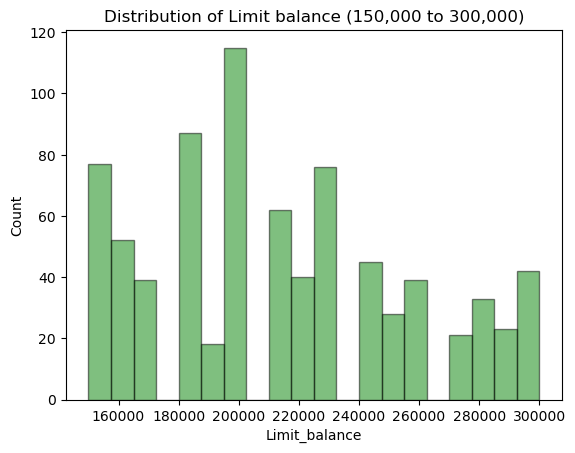

In [42]:
mask = (df['Limit_Balance'] >= 150000) & (df['Limit_Balance'] <= 300000)

# filter the data using the mask
filtered_data = df.loc[mask, 'Limit_Balance']

# create the histogram
plt.hist(filtered_data, bins=20, color='green', edgecolor='black', alpha=0.5)

# set the plot title and axis labels
plt.title('Distribution of Limit balance (150,000 to 300,000)')
plt.xlabel('Limit_balance')
plt.ylabel('Count')

# format the x-axis tick labels
plt.ticklabel_format(style='plain', axis='x')

# show the plot
plt.show()

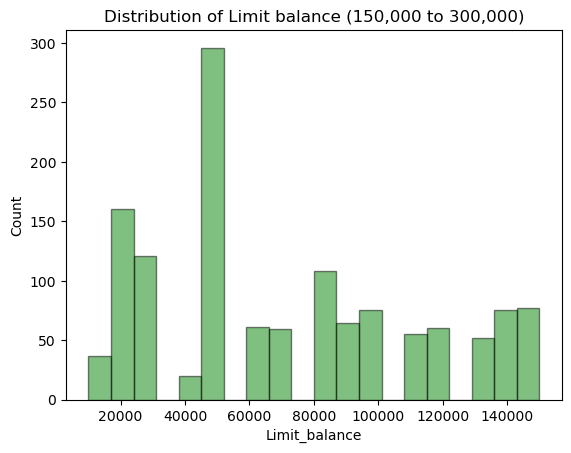

In [43]:
mask = (df['Limit_Balance'] >= 0) & (df['Limit_Balance'] <= 150000)

# filter the data using the mask
filtered_data = df.loc[mask, 'Limit_Balance']

# create the histogram
plt.hist(filtered_data, bins=20, color='green', edgecolor='black', alpha=0.5)

# set the plot title and axis labels
plt.title('Distribution of Limit balance (150,000 to 300,000)')
plt.xlabel('Limit_balance')
plt.ylabel('Count')

# format the x-axis tick labels
plt.ticklabel_format(style='plain', axis='x')

# show the plot
plt.show()

### Mean Payment Amount  Distribution

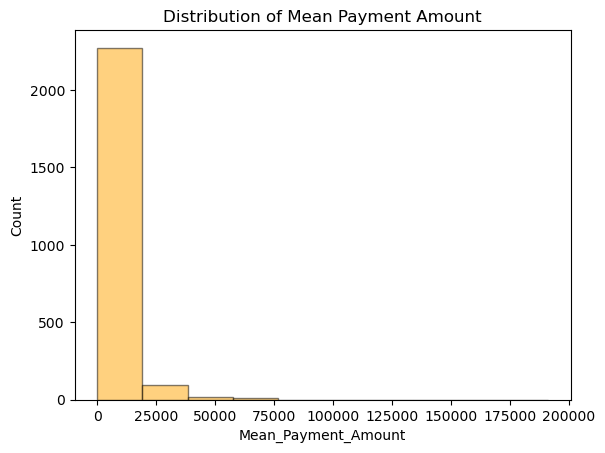

In [44]:
import matplotlib.pyplot as plt

plt.hist(df['Mean_Payment_Amount'], bins=10, color='orange', edgecolor='black', alpha=0.5)
plt.title('Distribution of Mean Payment Amount')
plt.xlabel('Mean_Payment_Amount')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

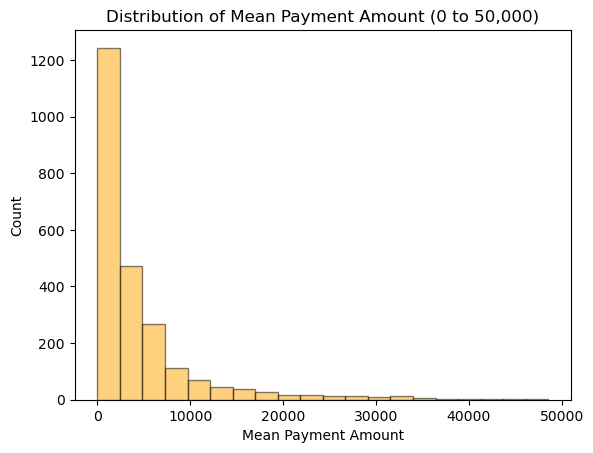

In [45]:
mask = (df['Mean_Payment_Amount'] >= 0) & (df['Mean_Payment_Amount'] <= 50000)

# filter the data using the mask
filtered_data = df.loc[mask, 'Mean_Payment_Amount']

# create the histogram
plt.hist(filtered_data, bins=20, color='orange', edgecolor='black', alpha=0.5)

# set the plot title and axis labels
plt.title('Distribution of Mean Payment Amount (0 to 50,000)')
plt.xlabel('Mean Payment Amount')
plt.ylabel('Count')

# format the x-axis tick labels
plt.ticklabel_format(style='plain', axis='x')

# show the plot
plt.show()

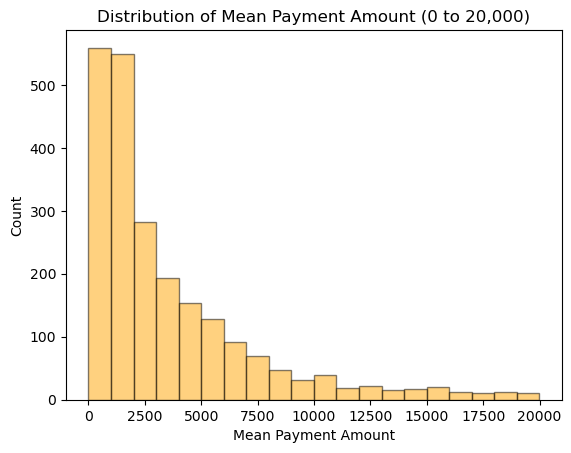

In [46]:
mask = (df['Mean_Payment_Amount'] >= 0) & (df['Mean_Payment_Amount'] <= 20000)

# filter the data using the mask
filtered_data = df.loc[mask, 'Mean_Payment_Amount']

# create the histogram
plt.hist(filtered_data, bins=20, color='orange', edgecolor='black', alpha=0.5)

# set the plot title and axis labels
plt.title('Distribution of Mean Payment Amount (0 to 20,000)')
plt.xlabel('Mean Payment Amount')
plt.ylabel('Count')

# format the x-axis tick labels
plt.ticklabel_format(style='plain', axis='x')

# show the plot
plt.show()

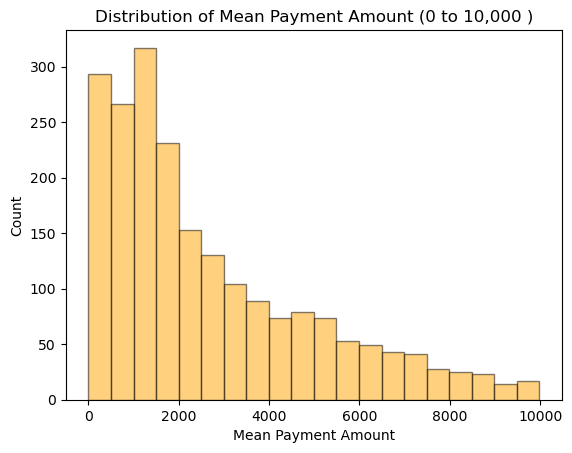

In [47]:
mask = (df['Mean_Payment_Amount'] >= 0) & (df['Mean_Payment_Amount'] <= 10000)

# filter the data using the mask
filtered_data = df.loc[mask, 'Mean_Payment_Amount']

# create the histogram
plt.hist(filtered_data, bins=20, color='orange', edgecolor='black', alpha=0.5)

# set the plot title and axis labels
plt.title('Distribution of Mean Payment Amount (0 to 10,000 )')
plt.xlabel('Mean Payment Amount')
plt.ylabel('Count')

# format the x-axis tick labels
plt.ticklabel_format(style='plain', axis='x')

# show the plot
plt.show()

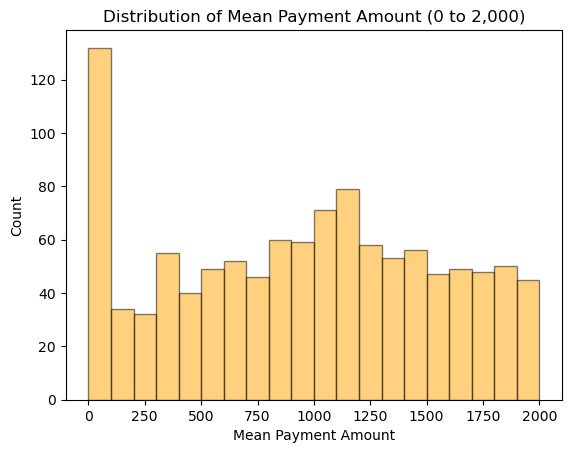

In [48]:
mask = (df['Mean_Payment_Amount'] >= 0) & (df['Mean_Payment_Amount'] <= 2000)

# filter the data using the mask
filtered_data = df.loc[mask, 'Mean_Payment_Amount']

# create the histogram
plt.hist(filtered_data, bins=20, color='orange', edgecolor='black', alpha=0.5)

# set the plot title and axis labels
plt.title('Distribution of Mean Payment Amount (0 to 2,000)')
plt.xlabel('Mean Payment Amount')
plt.ylabel('Count')

# format the x-axis tick labels
plt.ticklabel_format(style='plain', axis='x')

# show the plot
plt.show()

### Mean Bill Amount Distribution

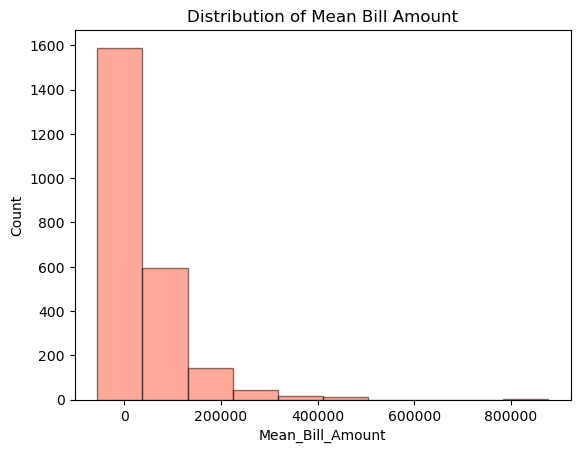

In [49]:
import matplotlib.pyplot as plt

plt.hist(df['Mean_Bill_Amount'], bins=10, color='#FF5733', edgecolor='black', alpha=0.5)
plt.title('Distribution of Mean Bill Amount')
plt.xlabel('Mean_Bill_Amount')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

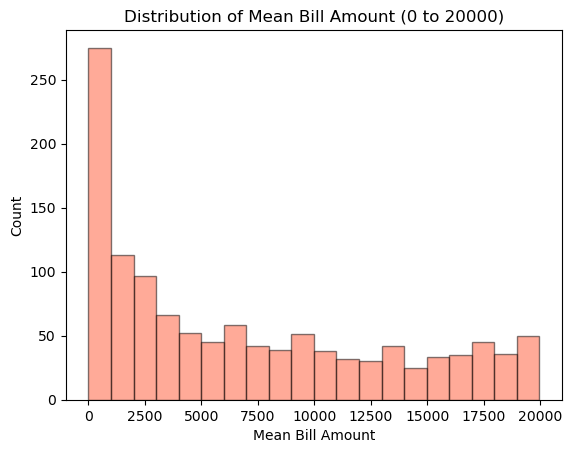

In [50]:
mask = (df['Mean_Bill_Amount'] >= 0) & (df['Mean_Bill_Amount'] <= 20000)

# filter the data using the mask
filtered_data = df.loc[mask, 'Mean_Bill_Amount']

# create the histogram
plt.hist(filtered_data, bins=20, color='#FF5733', edgecolor='black', alpha=0.5)

# set the plot title and axis labels
plt.title('Distribution of Mean Bill Amount (0 to 20000)')
plt.xlabel('Mean Bill Amount')
plt.ylabel('Count')

# format the x-axis tick labels
plt.ticklabel_format(style='plain', axis='x')

# show the plot
plt.show()

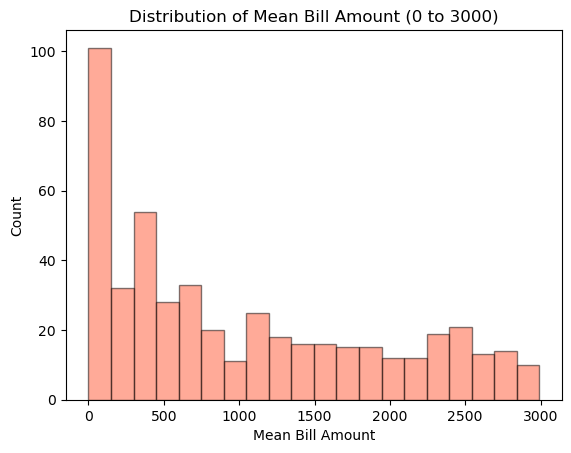

In [51]:
mask = (df['Mean_Bill_Amount'] >= 0) & (df['Mean_Bill_Amount'] <= 3000)

# filter the data using the mask
filtered_data = df.loc[mask, 'Mean_Bill_Amount']

# create the histogram
plt.hist(filtered_data, bins=20, color='#FF5733', edgecolor='black', alpha=0.5)

# set the plot title and axis labels
plt.title('Distribution of Mean Bill Amount (0 to 3000)')
plt.xlabel('Mean Bill Amount')
plt.ylabel('Count')

# format the x-axis tick labels
plt.ticklabel_format(style='plain', axis='x')

# show the plot
plt.show()

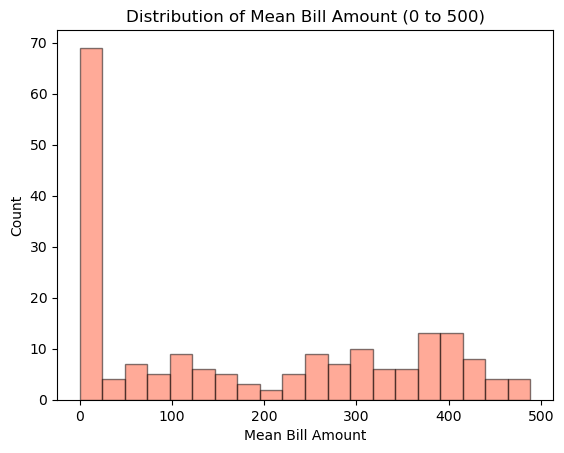

In [52]:
mask = (df['Mean_Bill_Amount'] >= 0) & (df['Mean_Bill_Amount'] <= 500)

# filter the data using the mask
filtered_data = df.loc[mask, 'Mean_Bill_Amount']

# create the histogram
plt.hist(filtered_data, bins=20, color='#FF5733', edgecolor='black', alpha=0.5)

# set the plot title and axis labels
plt.title('Distribution of Mean Bill Amount (0 to 500)')
plt.xlabel('Mean Bill Amount')
plt.ylabel('Count')

# format the x-axis tick labels
plt.ticklabel_format(style='plain', axis='x')

# show the plot
plt.show()

### Age Distribution

count    2396.000000
mean       35.419866
std         9.452344
min        21.000000
25%        28.000000
50%        34.000000
75%        41.000000
max        75.000000
Name: Age, dtype: float64

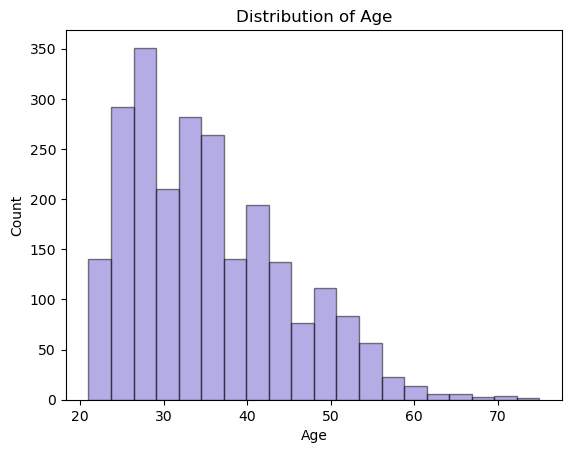

In [53]:
plt.hist(df['Age'], bins=20, color='#6A5ACD', edgecolor='black', alpha=0.5)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

df['Age'].describe()


### Sex Distribution

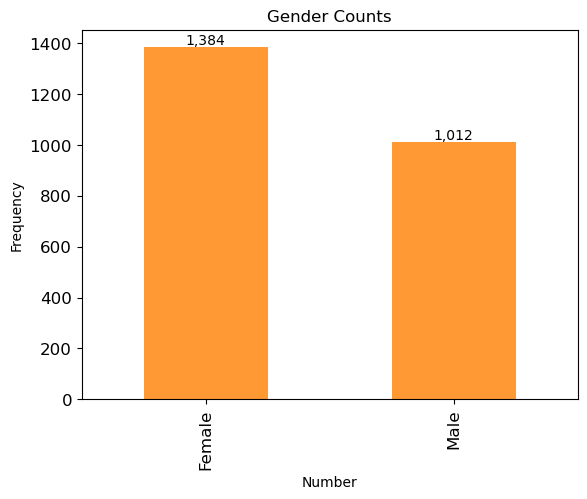

Female    1384
Male      1012
Name: Sex, dtype: int64

In [54]:
sex_counts = df['Sex'].value_counts().sort_values(ascending=False)

sex_counts.plot.bar(color='#ff9933')
plt.title('Gender Counts')
plt.xlabel('Number')
plt.ylabel('Frequency')

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

for i, val in enumerate(sex_counts):
    plt.annotate(f"{val:,}", xy=(i, val), va="bottom", ha="center", fontsize=10)
    
plt.show()

sex_counts

### Education Distribution

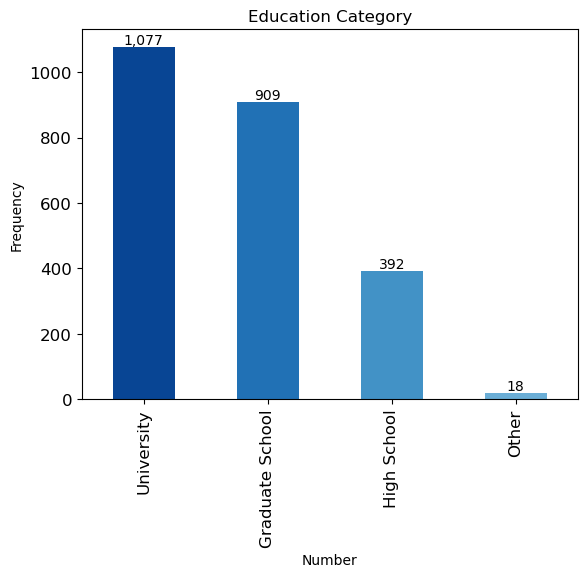

University         1077
Graduate School     909
High School         392
Other                18
Name: Education, dtype: int64

In [55]:
edu_counts = df['Education'].value_counts().sort_values(ascending=False)


edu_counts.plot.bar(color=['#084594', '#2171b5','#4292c6', '#6baed6'])
plt.title('Education Category')
plt.xlabel('Number')
plt.ylabel('Frequency')

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

for i, val in enumerate(edu_counts):
    plt.annotate(f"{val:,}", xy=(i, val), va="bottom", ha="center", fontsize=10)
    
plt.show()

edu_counts

### Civil Status Distribution

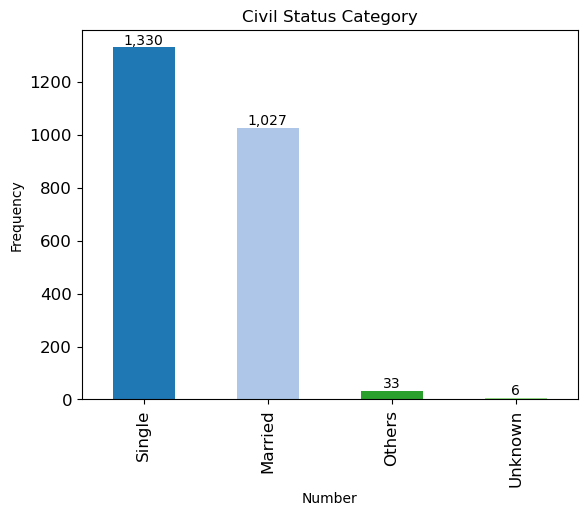

Single     1330
Married    1027
Others       33
Unknown       6
Name: Civil_Status, dtype: int64

In [56]:
civil_counts = df['Civil_Status'].value_counts().sort_values(ascending=False)

civil_counts.plot.bar(color= ['#1f77b4', '#aec7e8', '#2ca02c', '#98df8a'])
plt.title('Civil Status Category')
plt.xlabel('Number')
plt.ylabel('Frequency')


plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

for i, val in enumerate(civil_counts):
    plt.annotate(f"{val:,}", xy=(i, val), va="bottom", ha="center", fontsize=10)
    
plt.show()

civil_counts

## **Bivariate Analysis**

### Pearson Correlation Matrix between Numerical Variables

**Correlation Matrix between Limit Balance, Mean Payment Amount, Mean Bill Amount**

In [57]:
df_num=df[['Mean_Payment_Amount', 'Mean_Bill_Amount', 'Limit_Balance', 'Mean_Payment_Status', 'Age', 'Outcome_ID']]

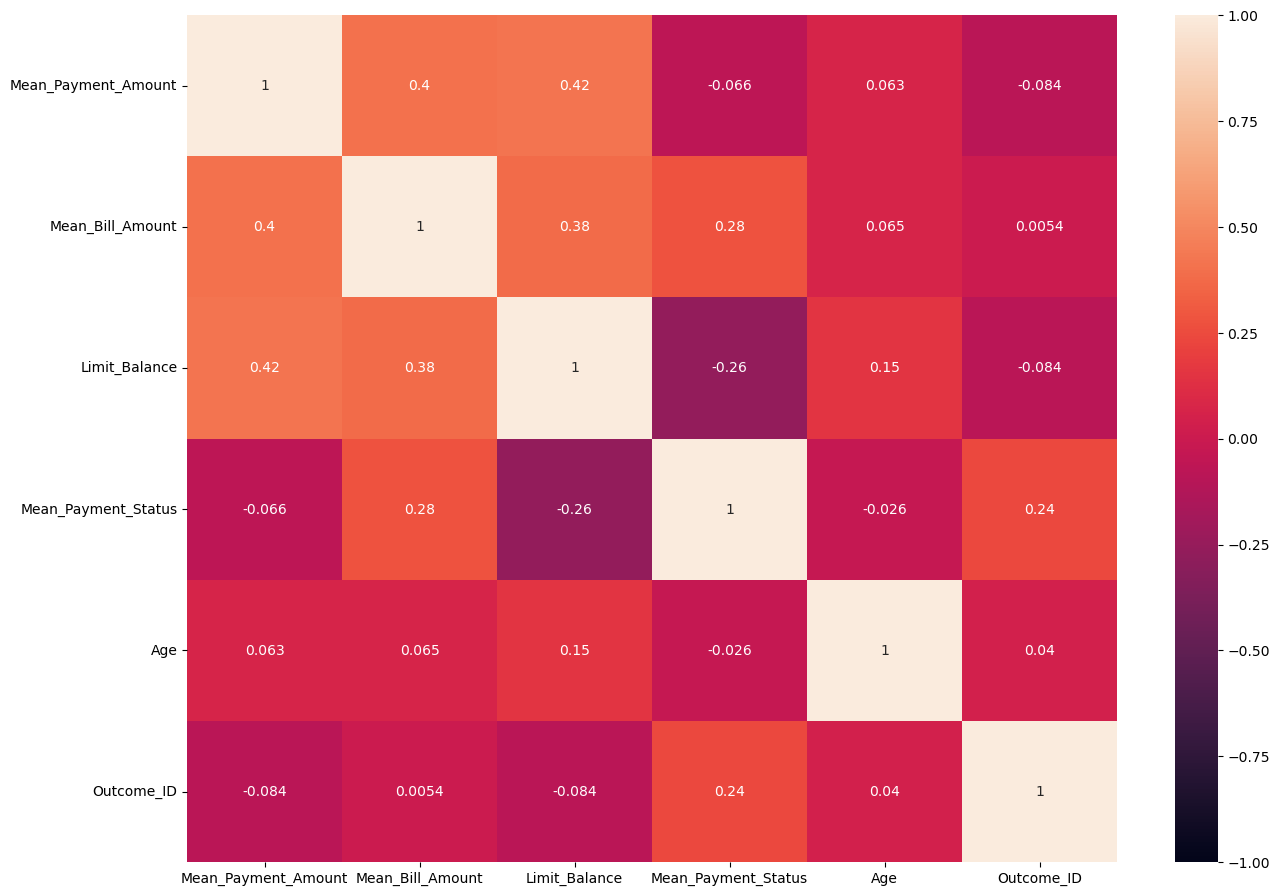

In [58]:
fig, ax = plt.subplots(figsize=(15, 11))

heatmap = sns.heatmap(df_num.corr(), vmin=-1, vmax=1, annot=True)

plt.show()


Based on the Pearson correlation matrix between the numerical variables, the following conclusions can be drawn:

- 1. **Limit Balance and Mean_Bill_Amount**: There is a positive correlation of 0.42 between Limit Balance and Mean_Bill_Amount. This finding supports the understanding that the higher the credit limit (Limit Balance) a client has, the higher their average bill amount (Mean_Bill_Amount) tends to be. This correlation suggests that the credit limit plays a role in determining the monthly bill amounts.
---
- 2. **Mean_Bill_Amount and Limit_Balance:** Similarly, Mean_Bill_Amount and Limit_Balance exhibit a positive correlation of 0.38. This supports the notion that a higher credit limit is associated with higher average bill amounts. The correlation suggests that clients with higher credit limits tend to borrow more and accumulate higher bill amounts.

---

- 3. **Mean_Bill_Amount and Mean_Payment_Amount:** There is a positive correlation of 0.4 between Mean_Bill_Amount and Mean_Payment_Amount. This implies that higher average bill amounts are associated with higher average payment amounts. It suggests that clients who receive larger bills tend to make larger payments.

---

- 4. **Mean_Bill_Amount and Mean_Payment_Status:** Interestingly, Mean_Bill_Amount shows a positive correlation of 0.28 with Mean_Payment_Status. This suggests that higher bill amounts are positively correlated with clients not paying on time. It implies that clients who have higher bills are more likely to have delayed payments or payment defaults.

---

- 5. **Mean_Payment_Status and Limit_Balance:** Mean_Payment_Status has a negative correlation of -0.26 with Limit_Balance. This indicates that a lower credit limit is positively correlated with clients making payments on time. It suggests that clients with lower credit limits are more likely to make timely payments or avoid payment defaults.


### Point Biserial Correlation Matrix between Numerical and Dichotomous variables

**Dummifying categorical variables**

In [59]:
df_cat = pd.get_dummies(df, columns=['Sex', 'Education', 'Outcome', 'Civil_Status'])

In [60]:
df_cat = df_cat.drop(columns=['Outcome_ID', 'Sex_ID', 'Education_ID', 'Civil_Status_ID',
                                 'Payment_1', 'Payment_2', 'Payment_3', 'Payment_4', 'Payment_5', 'Payment_6',
                                 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Bill_Amount4', 'Bill_Amount5',
                                 'Bill_Amount6', 'Pay_Amount1', 'Pay_Amount2', 'Pay_Amount3', 'Pay_Amount4',
                                 'Pay_Amount5', 'Pay_Amount6', 'Limit_Balance_Cat', 'Age_Cat'])

In [61]:
import pandas as pd
from scipy import stats

# Calculate point-biserial correlation coefficients
corr_matrix = pd.DataFrame(index=['Outcome_ID'], columns=['Age', 'Limit_Balance', 'Mean_Bill_Amount', 'Mean_Payment_Amount', 'Mean_Payment_Status'])

corr_matrix.loc['Outcome_ID', 'Age'], _ = stats.pointbiserialr(df['Outcome_ID'], df['Age'])
corr_matrix.loc['Outcome_ID', 'Limit_Balance'], _ = stats.pointbiserialr(df['Outcome_ID'], df['Limit_Balance'])
corr_matrix.loc['Outcome_ID', 'Mean_Bill_Amount'], _ = stats.pointbiserialr(df['Outcome_ID'], df['Mean_Bill_Amount'])
corr_matrix.loc['Outcome_ID', 'Mean_Payment_Amount'], _ = stats.pointbiserialr(df['Outcome_ID'], df['Mean_Payment_Amount'])
corr_matrix.loc['Outcome_ID', 'Mean_Payment_Status'], _ = stats.pointbiserialr(df['Outcome_ID'], df['Mean_Payment_Status'])


print(corr_matrix)

                 Age Limit_Balance Mean_Bill_Amount Mean_Payment_Amount  \
Outcome_ID  0.039677     -0.084348         0.005431           -0.084176   

           Mean_Payment_Status  
Outcome_ID            0.235506  


Based on the correlation matrix, the following conclusions can be made regarding the analysis:


- **Mean_Payment_Status:** The variable **"Mean_Payment_Status" shows a statistically significant positive correlation with "Outcome_ID" (the dependent variable) with a correlation coefficient of 0.2355. This indicates that higher values of Mean_Payment_Status are associated with higher values of Outcome_ID.**



---

As a first glance. it makes sense that Mean_Payment Status is positively correlated with Defaulting, since it indicates the number of months that the client has been not paying duly on its credit and the likelyhood that it will default next month


Further analysis should be conducted to understand the nature of this relationship and its potential implications.


---


- **Age, Limit_Balance, Mean_Bill_Amount, and Mean_Payment_Amount:** These variables **do not show a statistically significant correlation with "Outcome_ID"** based on the correlation matrix. However, it's important to note that correlation coefficients alone do not capture the entire relationship between variables, and there could be other factors or interactions at play that should be explored through additional analyses.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Outcome                        2396 non-null   object  
 1   Outcome_ID                     2396 non-null   int64   
 2   Sex                            2396 non-null   object  
 3   Sex_ID                         2396 non-null   int64   
 4   Education                      2396 non-null   object  
 5   Education_ID                   2396 non-null   int64   
 6   Civil_Status                   2396 non-null   object  
 7   Civil_Status_ID                2396 non-null   int64   
 8   Age                            2396 non-null   int64   
 9   Limit_Balance                  2396 non-null   float64 
 10  Payment_1                      2396 non-null   int64   
 11  Payment_2                      2396 non-null   int64   
 12  Payment_3                      239

### Spearman  Correlation Matrix between Pay_1...6 and Outcome 

In [63]:
df_corr = df[['Outcome_ID', 'Payment_1', 'Payment_2', 'Payment_3', 'Payment_4', 'Payment_5', 'Payment_6', 'class_A', 'class_C', 'class_D', 'class_E', 'class_S', 'Constant_Delay_Payment_Status', 'Consumption>Pay', 'Bill_Amount>Limit_Balance']]
corr_matrix = df_corr.corr(method='spearman')

print(corr_matrix)

                               Outcome_ID  Payment_1  Payment_2  Payment_3  \
Outcome_ID                       1.000000   0.271757   0.165464   0.164511   
Payment_1                        0.271757   1.000000   0.565030   0.502717   
Payment_2                        0.165464   0.565030   1.000000   0.803388   
Payment_3                        0.164511   0.502717   0.803388   1.000000   
Payment_4                        0.130924   0.452891   0.706187   0.810715   
Payment_5                        0.137300   0.431055   0.691860   0.728823   
Payment_6                        0.100663   0.423553   0.668988   0.693101   
class_A                         -0.493887  -0.149503  -0.018262  -0.068275   
class_C                          0.644731   0.133343   0.145067   0.104916   
class_D                          0.595563   0.117945  -0.051735  -0.012075   
class_E                          0.299530   0.245703   0.252479   0.255767   
class_S                         -0.356329  -0.080410  -0.127150 

As observed, all variables have a slight positive correlation with the client defaulting, but also a high correlation within themselves. To avoid multicollinearity when modelling, I will combine each of this variables into Mean_Payment_Status to predict Outcome. 

This way:

- Creating Mean_Payment_Status allows  to capture the overall payment behavior of the client across multiple months while reducing the correlation among variables. This can potentially improve the stability and interpretability of the model

### Demographic Variables and Outcome

**Outcome per Age Group**

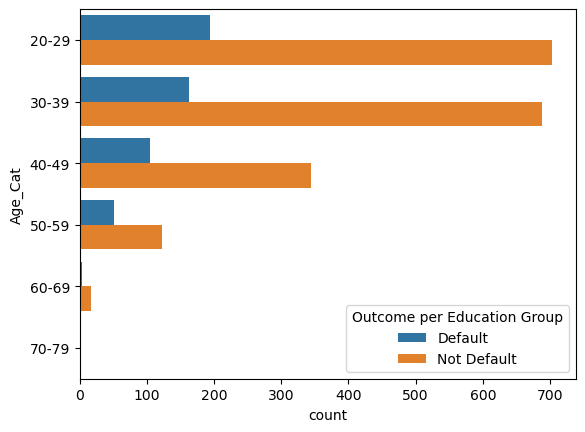

Outcome,Default,Not Default
Age_Cat,,
20-29,0.216276,0.783724
30-39,0.191539,0.808461
40-49,0.233333,0.766667
50-59,0.294798,0.705202
60-69,0.190476,0.809524
70-79,0.500000,0.500000


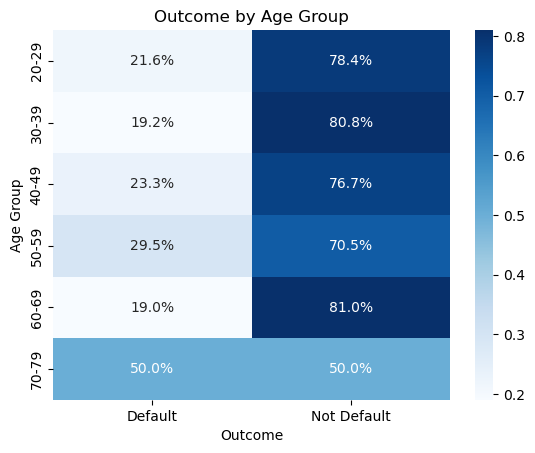

In [64]:
sns.countplot(data=df, y="Age_Cat", hue="Outcome")

plt.legend(title='Outcome per Education Group')

# Add percentage text labels
for p in ax.patches:
    total = len(df)
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    ax.text(p.get_x()+p.get_width()/2., height + 3, percentage, ha="center")
    
# Show plot
plt.show()


# Create a crosstab table of Education and Outcome
at = pd.crosstab(df['Age_Cat'], df['Outcome'], normalize='index')

# Plot the crosstab table as a heatmap
sns.heatmap(at, cmap='Blues', annot=True, fmt='.1%')

# Set the axis labels and title
plt.xlabel('Outcome')
plt.ylabel('Age Group')
plt.title('Outcome by Age Group')

at

**Outcome per Sex Group**

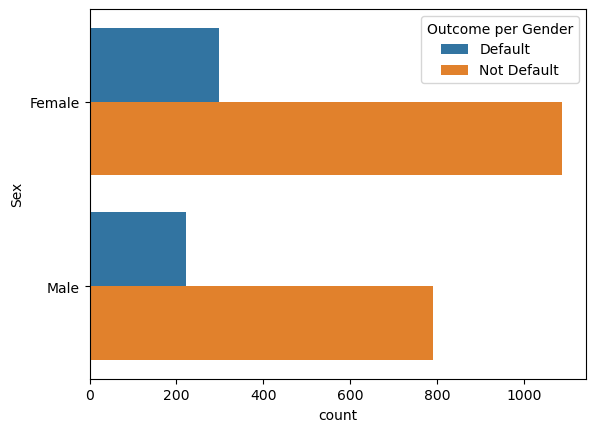

Outcome,Default,Not Default
Sex,,
Female,0.214595,0.785405
Male,0.219368,0.780632


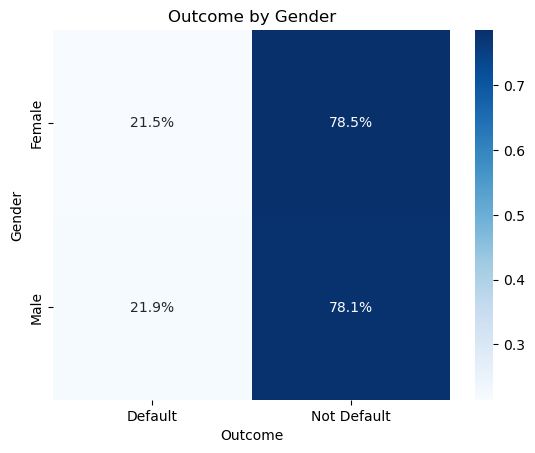

In [65]:
sns.countplot(data=df, y="Sex", hue="Outcome")

plt.legend(title='Outcome per Gender')

# Add percentage text labels
for p in ax.patches:
    total = len(df)
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    ax.text(p.get_x()+p.get_width()/2., height + 3, percentage, ha="center")
    
# Show plot
plt.show()

# Create a crosstab table of Education and Outcome
bt = pd.crosstab(df['Sex'], df['Outcome'], normalize='index')

# Plot the crosstab table as a heatmap
sns.heatmap(bt, cmap='Blues', annot=True, fmt='.1%')

# Set the axis labels and title
plt.xlabel('Outcome')
plt.ylabel('Gender')
plt.title('Outcome by Gender')

bt

**Outcome per Education Group**

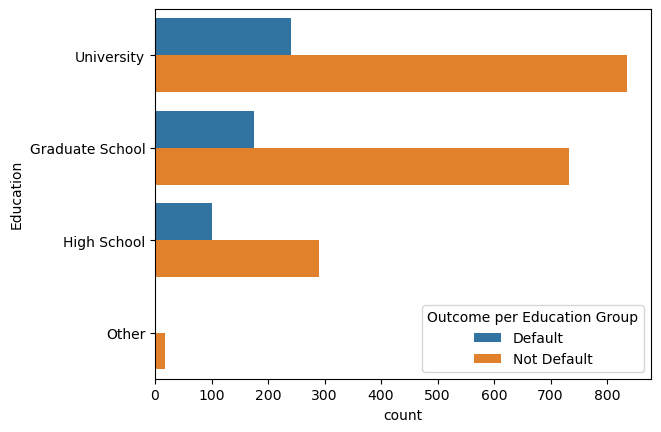

Outcome,Default,Not Default
Education,,
Graduate School,0.193619,0.806381
High School,0.257653,0.742347
Other,0.055556,0.944444
University,0.223770,0.776230


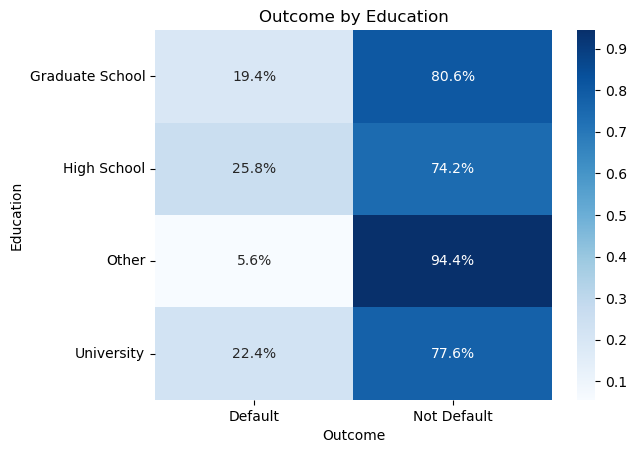

In [66]:
sns.countplot(data=df, y="Education", hue="Outcome")

plt.legend(title='Outcome per Education Group')

# Add percentage text labels
for p in ax.patches:
    total = len(df)
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    ax.text(p.get_x()+p.get_width()/2., height + 3, percentage, ha="center")
    
# Show plot
plt.show()


# Create a crosstab table of Education and Outcome
ct = pd.crosstab(df['Education'], df['Outcome'], normalize='index')

# Plot the crosstab table as a heatmap
sns.heatmap(ct, cmap='Blues', annot=True, fmt='.1%')

# Set the axis labels and title
plt.xlabel('Outcome')
plt.ylabel('Education')
plt.title('Outcome by Education')

ct

**Outcome per Civil Status Group**

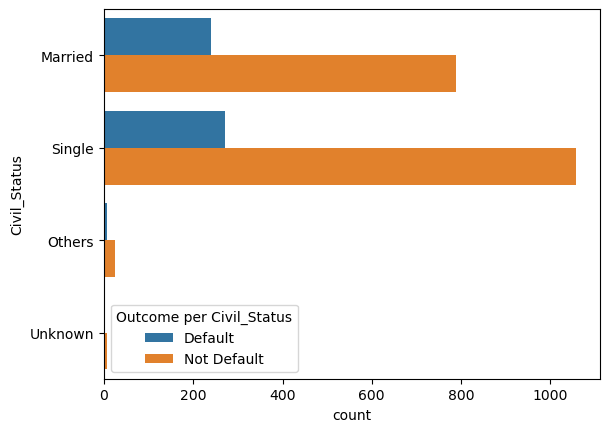

Outcome,Default,Not Default
Civil_Status,,
Married,0.232717,0.767283
Others,0.242424,0.757576
Single,0.204511,0.795489
Unknown,0.000000,1.000000


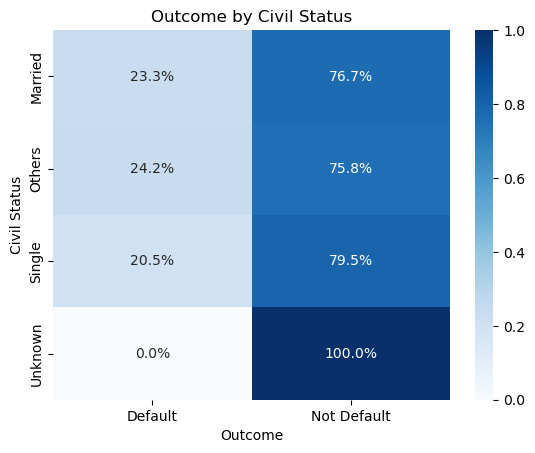

In [67]:
sns.countplot(data=df, y="Civil_Status", hue="Outcome")

plt.legend(title='Outcome per Civil_Status')

# Add percentage text labels
for p in ax.patches:
    total = len(df)
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    ax.text(p.get_x()+p.get_width()/2., height + 3, percentage, ha="center")
    
# Show plot
plt.show()

# Create a crosstab table of Education and Outcome
bt = pd.crosstab(df['Civil_Status'], df['Outcome'], normalize='index')

# Plot the crosstab table as a heatmap
sns.heatmap(bt, cmap='Blues', annot=True, fmt='.1%')

# Set the axis labels and title
plt.xlabel('Outcome')
plt.ylabel('Civil Status')
plt.title('Outcome by Civil Status')

bt

### Limit Balance per Demographic Variables

**Limit Balance per age group**

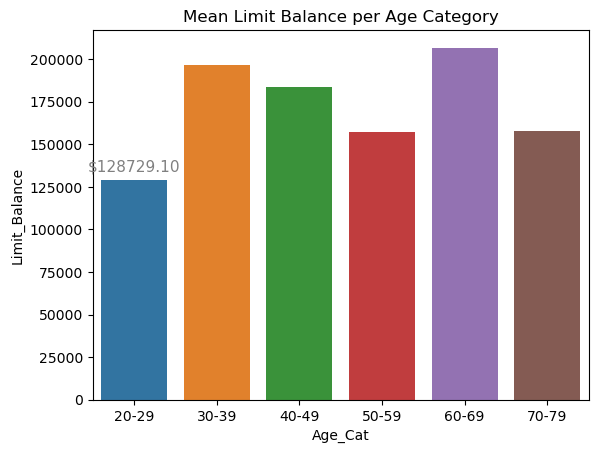

In [68]:
z = df.groupby('Age_Cat')['Limit_Balance'].mean().reset_index()
z = z.sort_values('Limit_Balance', ascending=False)


# create the bar plot
ax = sns.barplot(data=z, x='Age_Cat', y='Limit_Balance')

plt.title('Mean Limit Balance per Age Category')


# add labels to the bars
for p in ax.patches:
    ax.annotate(f"${p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
                fontsize=11, color='gray', xytext=(0, 10), textcoords='offset points')
    plt.show()

In [69]:
z

,Age_Cat,Limit_Balance
4,60-69,206666.666667
1,30-39,196263.219741
2,40-49,183688.888889
5,70-79,157500.000000
3,50-59,157341.040462
0,20-29,128729.096990


**Limit Balance per Gender**

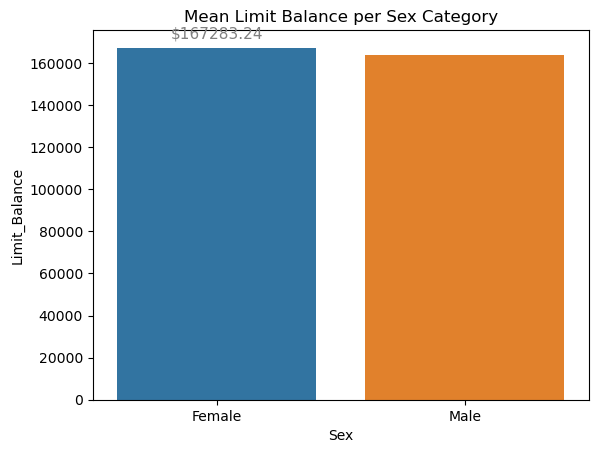

In [70]:
c = df.groupby('Sex')['Limit_Balance'].mean().reset_index()
c = c.sort_values('Limit_Balance', ascending=False)


# create the bar plot
ax = sns.barplot(data=c, x='Sex', y='Limit_Balance')

plt.title('Mean Limit Balance per Sex Category')


# add labels to the bars
for p in ax.patches:
    ax.annotate(f"${p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
                fontsize=11, color='gray', xytext=(0, 10), textcoords='offset points')
    plt.show()

In [71]:
c

,Sex,Limit_Balance
0,Female,167283.236994
1,Male,163853.754941


**Limit Balance per Education Category**

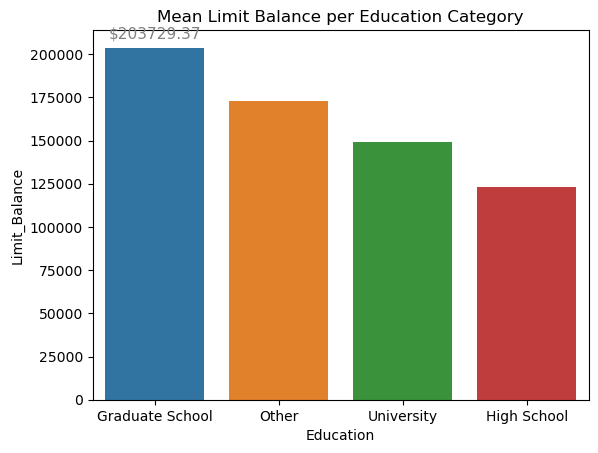

In [72]:
a = df.groupby('Education')['Limit_Balance'].mean().reset_index()
a = a.sort_values('Limit_Balance', ascending=False)


# create the bar plot
ax = sns.barplot(data=a, x='Education', y='Limit_Balance')

plt.title('Mean Limit Balance per Education Category')


# add labels to the bars
for p in ax.patches:
    ax.annotate(f"${p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
                fontsize=11, color='gray', xytext=(0, 10), textcoords='offset points')
    plt.show()

In [73]:
a

,Education,Limit_Balance
0,Graduate School,203729.372937
2,Other,172777.777778
3,University,149257.195915
1,High School,123188.775510


**Limit Balance per Civil Status Category**

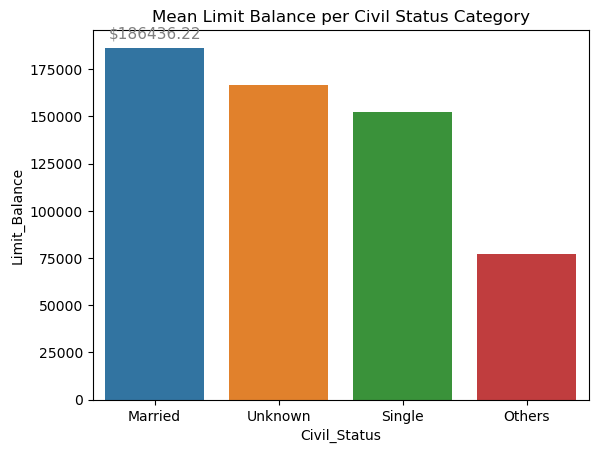

In [74]:
b = df.groupby('Civil_Status')['Limit_Balance'].mean().reset_index()
b = b.sort_values('Limit_Balance', ascending=False)


# create the bar plot
ax = sns.barplot(data=b, x='Civil_Status', y='Limit_Balance')

plt.title('Mean Limit Balance per Civil Status Category')


# add labels to the bars
for p in ax.patches:
    ax.annotate(f"${p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
                fontsize=11, color='gray', xytext=(0, 10), textcoords='offset points')
    plt.show()

In [75]:
b

,Civil_Status,Limit_Balance
0,Married,186436.222006
3,Unknown,166666.666667
2,Single,152120.300752
1,Others,77272.727273


**Normalize it or add the same height to compare distributions**

### Outcome per Limit Balance Amount

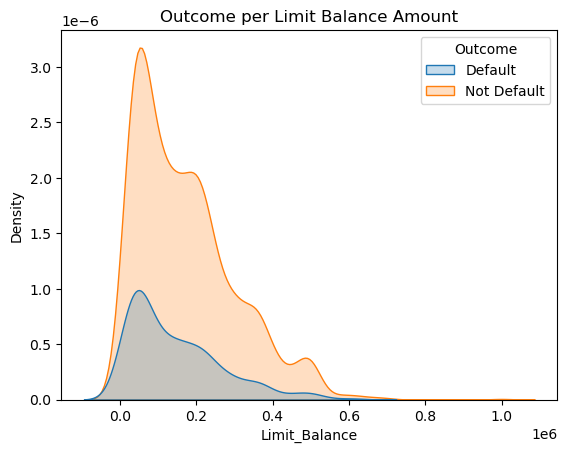

In [76]:
sns.kdeplot(data=df, x='Limit_Balance', hue='Outcome', fill=True)

plt.title('Outcome per Limit Balance Amount', fontsize=12)

plt.show()

### Outcome per Mean Payment Amount

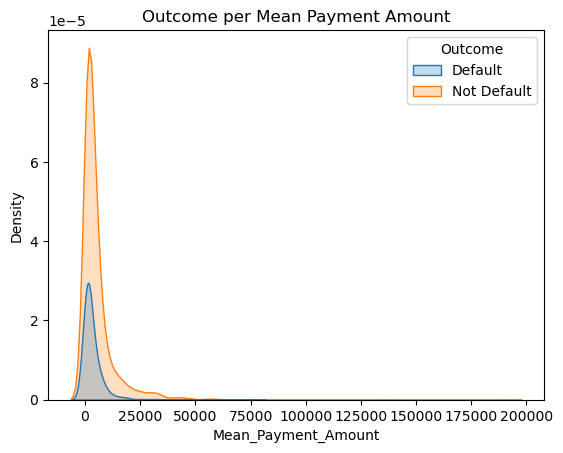

In [77]:
sns.kdeplot(data=df, x='Mean_Payment_Amount', hue='Outcome', fill=True)

plt.title('Outcome per Mean Payment Amount', fontsize=12)

plt.show()

### Outcome per Mean Bill Amount

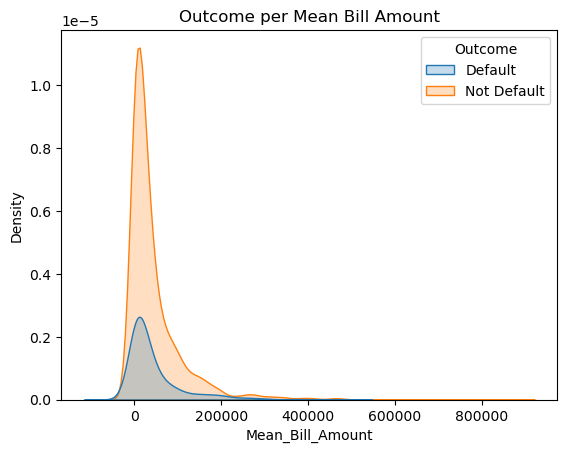

In [78]:
sns.kdeplot(data=df, x='Mean_Bill_Amount', hue='Outcome', fill=True)

plt.title('Outcome per Mean Bill Amount', fontsize=12)

plt.show()

# **Predictive Models**

## **Predicting Outcome**

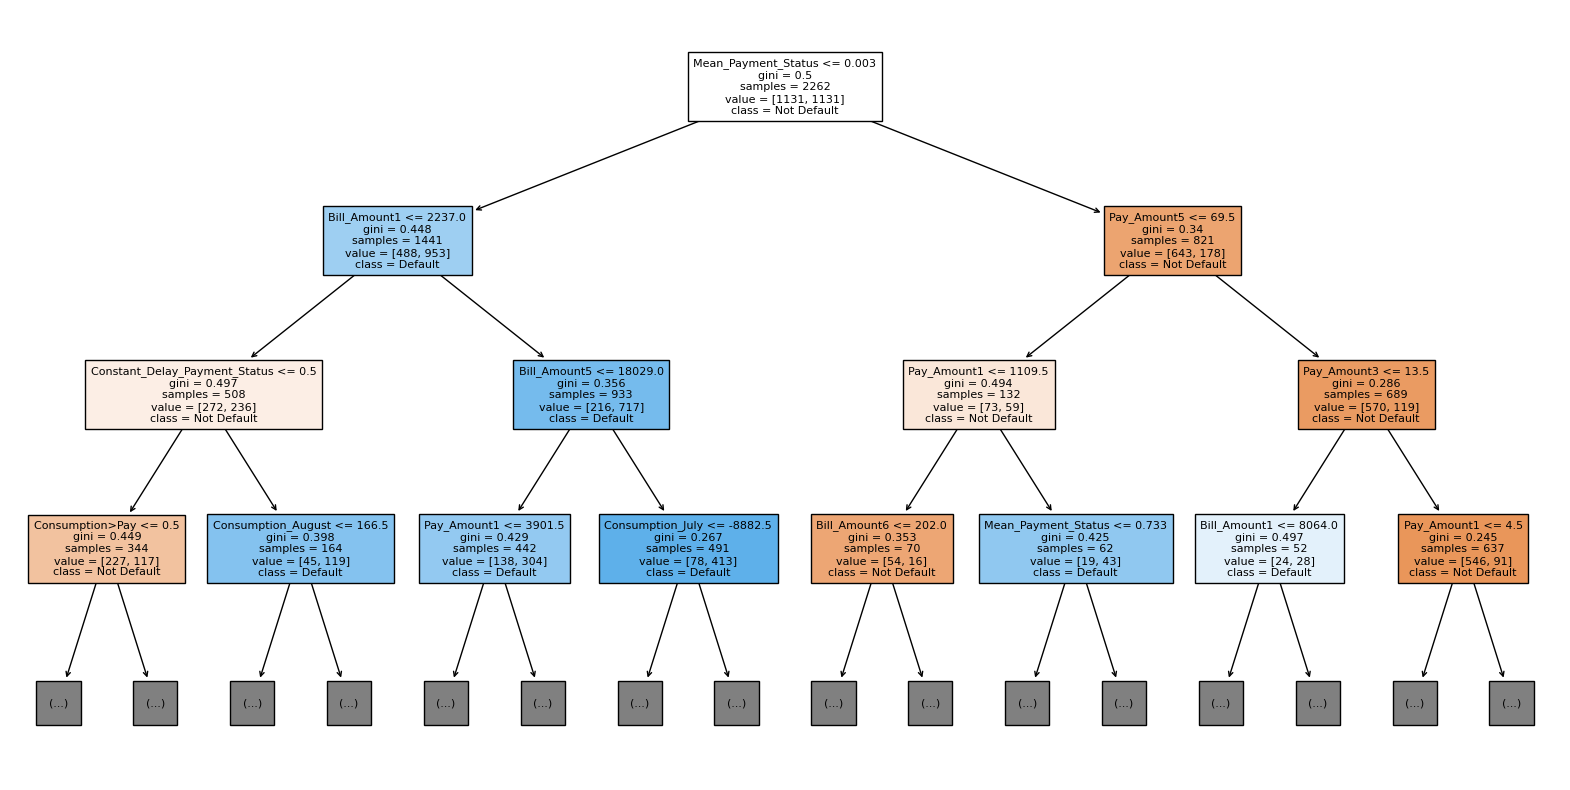

In [79]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree



# Select only numerical variables
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
x_outcome = df[numerical_columns]


# Remove the 'Outcome' column
x_outcome = x_outcome.drop('Outcome_ID', axis=1)
y_outcome=df['Outcome']


# Scale the numerical features
scaler = StandardScaler()
x_outcome_scaled = scaler.fit_transform(x_outcome)

# Train Test Split with  Independent and Dependent Variables and Test size of 40%

x_outcome_train, x_outcome_test, y_outcome_train, y_outcome_test = train_test_split(x_outcome, 
                                        y_outcome, test_size = 0.4, random_state=2)


# Balancing classes 'Default', 'Not Default' before training the model

smote = SMOTE(random_state=2)

x_outcome_train_sm, y_outcome_train_sm = smote.fit_resample(x_outcome_train, y_outcome_train)


# Using the Decision Tree Classifier machine learning algorithm

tree_outcome = DecisionTreeClassifier()

# Fitting the balanced training data to the model  

model_tree = tree_outcome.fit(x_outcome_train_sm, y_outcome_train_sm)

# Cross validation to ensure not overfitting

cv_scores = cross_val_score(model_tree, x_outcome_train_sm, y_outcome_train_sm, cv=10)

# Predicting the target variable for the test data

prediction_outcome=model_tree.predict(x_outcome_test)

# Visualizing the decision tree with a depth of 3 for simplicity

plt.figure(figsize=(20,10))
plot_tree(model_tree, feature_names=list(x_outcome_train.columns), class_names=list(y_outcome_train.unique()), 
          filled=True, fontsize=8, max_depth=3)
plt.show()


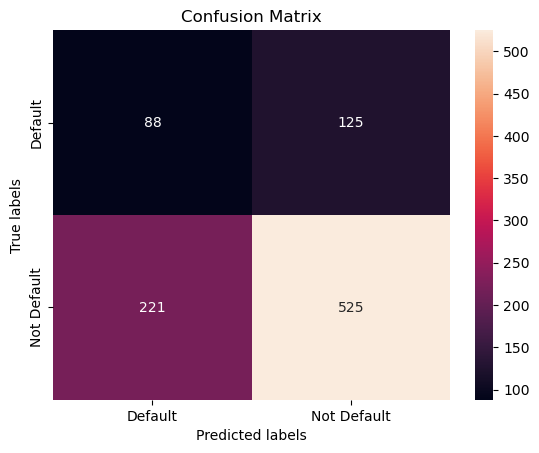

In [80]:
cm = metrics.confusion_matrix(y_outcome_test, prediction_outcome)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Default', 'Not Default']); ax.yaxis.set_ticklabels(['Default', 'Not Default']);

In [81]:
print(classification_report(y_outcome_test, prediction_outcome))

              precision    recall  f1-score   support

     Default       0.28      0.41      0.34       213
 Not Default       0.81      0.70      0.75       746

    accuracy                           0.64       959
   macro avg       0.55      0.56      0.54       959
weighted avg       0.69      0.64      0.66       959



**Feature Selection**

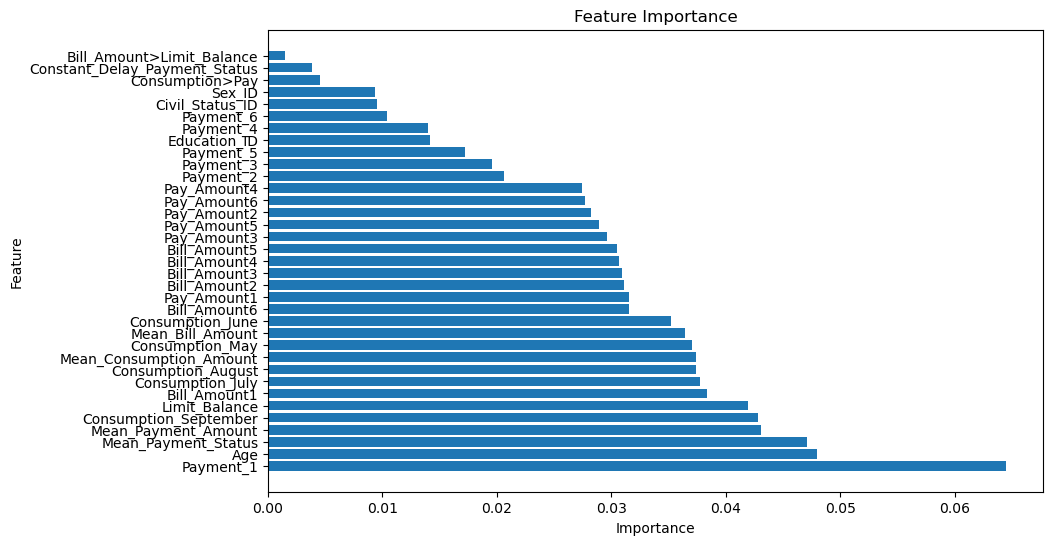

                          Feature  Importance
5                       Payment_1        0.06
3                             Age        0.05
25            Mean_Payment_Status        0.05
23            Mean_Payment_Amount        0.04
26          Consumption_September        0.04
4                   Limit_Balance        0.04
11                   Bill_Amount1        0.04
28               Consumption_July        0.04
27             Consumption_August        0.04
31        Mean_Consumption_Amount        0.04
30                Consumption_May        0.04
24               Mean_Bill_Amount        0.04
29               Consumption_June        0.04
16                   Bill_Amount6        0.03
17                    Pay_Amount1        0.03
12                   Bill_Amount2        0.03
13                   Bill_Amount3        0.03
14                   Bill_Amount4        0.03
15                   Bill_Amount5        0.03
19                    Pay_Amount3        0.03
21                    Pay_Amount5 

In [82]:
from sklearn.ensemble import RandomForestClassifier

# Select only numerical variables
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
x_outcome = df[numerical_columns]


# Remove the 'Outcome' column
x_outcome = x_outcome.drop('Outcome_ID', axis=1)
y_outcome=df['Outcome']

# Initializing the Random Forest classifier
rf = RandomForestClassifier()
rf.fit(x_outcome, y_outcome)
importances = rf.feature_importances_

feature_importances = pd.DataFrame({'Feature': x_outcome.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Printing the feature importances
print(feature_importances)

**Now I will proceed to get a better model using the RFE estimator**

In [83]:
from sklearn.feature_selection import RFE

# Create the RFE object and specify the model and the number of desired features
rfe = RFE(estimator=tree_outcome, n_features_to_select=3)

# Perform feature selection
x_outcome_train_selected = rfe.fit_transform(x_outcome_train_sm, y_outcome_train_sm)

# Get the selected features
selected_features = x_outcome_train.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Bill_Amount1', 'Mean_Payment_Status', 'Consumption_July'], dtype='object')


**These are the three most statistical significant variables to predict Outcome. After comibining these, I have found that solely Mean_Payment_Status is the best predictor to predict Outcome.**

---

**By using only Mean_Payment_Status, the model's complexity has reduced by far and we have reduced greatly multicolinearity**

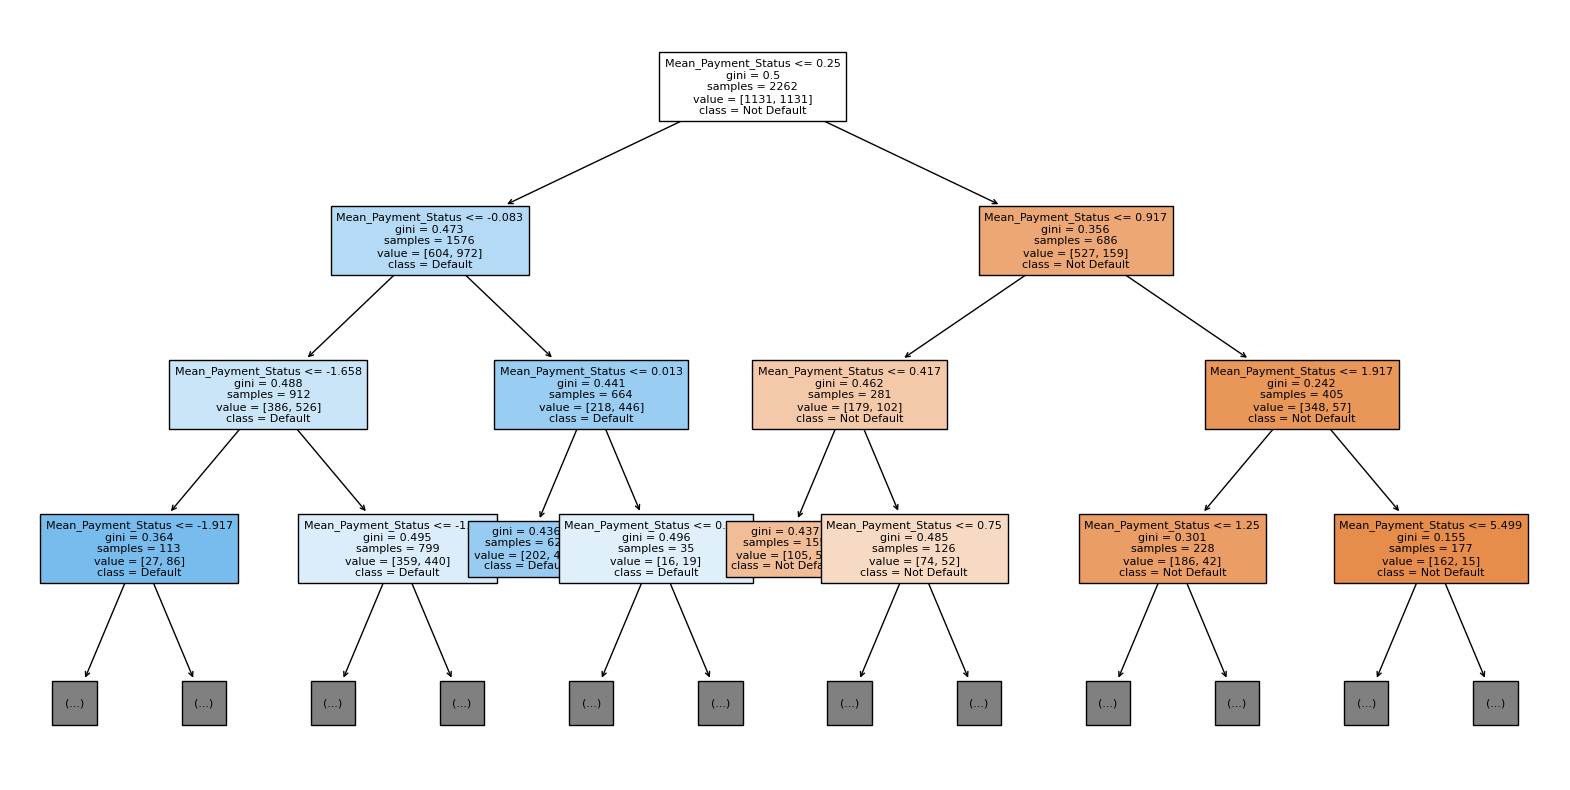

In [84]:
# Independent and Dependent Variables
x_outcome = df[['Mean_Payment_Status']]
y_outcome=df['Outcome']


# ReScale the features
scaler = StandardScaler()
x_outcome_scaled = scaler.fit_transform(x_outcome)

# Train Test Split with  Independent and Dependent Variables and Test size of 40%

x_outcome_train, x_outcome_test, y_outcome_train, y_outcome_test = train_test_split(x_outcome, 
                                        y_outcome, test_size = 0.4, random_state=2)


# Balancing classes 'Default', 'Not Default' before training the model

smote = SMOTE(random_state=2)

x_outcome_train_sm, y_outcome_train_sm = smote.fit_resample(x_outcome_train, y_outcome_train)


# Using the Decision Tree Classifier machine learning algorithm

tree_outcome = DecisionTreeClassifier()

# Fitting the balanced training data to the model  

model_tree = tree_outcome.fit(x_outcome_train_sm, y_outcome_train_sm)

# Cross validation to ensure not overfitting

cv_scores = cross_val_score(model_tree, x_outcome_train_sm, y_outcome_train_sm, cv=10)

# Predicting the target variable for the test data

prediction_outcome=model_tree.predict(x_outcome_test)

# Visualizing the decision tree with a depth of 3 for simplicity

plt.figure(figsize=(20,10))
plot_tree(model_tree, feature_names=list(x_outcome_train.columns), class_names=list(y_outcome_train.unique()), 
          filled=True, fontsize=8, max_depth=3)
plt.show()


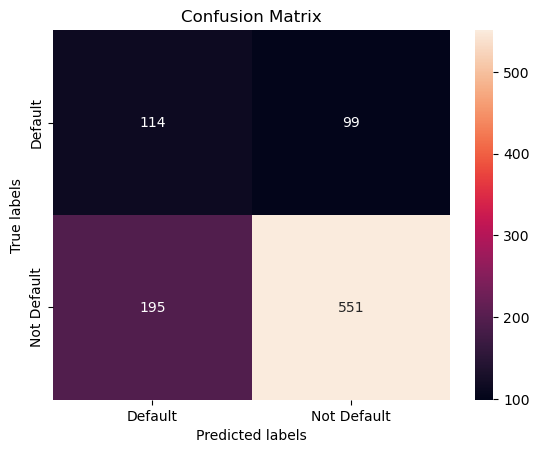

In [85]:
cm = metrics.confusion_matrix(y_outcome_test, prediction_outcome)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Default', 'Not Default']); ax.yaxis.set_ticklabels(['Default', 'Not Default']);

In [86]:
print(classification_report(y_outcome_test, prediction_outcome))

              precision    recall  f1-score   support

     Default       0.37      0.54      0.44       213
 Not Default       0.85      0.74      0.79       746

    accuracy                           0.69       959
   macro avg       0.61      0.64      0.61       959
weighted avg       0.74      0.69      0.71       959



**Comment: As seen, although the macro avg does not improve by far(0.59 vs 0.54), we have greatly reduced the models complexity to two variables**

**Best Model overall using LazyClassifier**

In [87]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = clf.fit(x_outcome_train_sm, x_outcome_test, y_outcome_train_sm, y_outcome_test)
models

100%|███████████████████████████████████████████| 29/29 [00:01<00:00, 21.67it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.72,0.65,None,0.73,0.14
LabelSpreading,0.72,0.64,None,0.73,0.17
LabelPropagation,0.72,0.64,None,0.73,0.08
ExtraTreesClassifier,0.69,0.64,None,0.71,0.08
RandomForestClassifier,0.69,0.64,None,0.71,0.09
DecisionTreeClassifier,0.69,0.64,None,0.71,0.01
ExtraTreeClassifier,0.69,0.63,None,0.71,0.01
LGBMClassifier,0.69,0.63,None,0.71,0.06
SGDClassifier,0.73,0.62,None,0.73,0.01


In [88]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler

# Independent and Dependent Variables
x_outcome = df[['Mean_Payment_Status']]
y_outcome = df['Outcome']

# Rescale the features
scaler = StandardScaler()
x_outcome_scaled = scaler.fit_transform(x_outcome)

# Train Test Split with Independent and Dependent Variables and Test size of 40%
x_outcome_train, x_outcome_test, y_outcome_train, y_outcome_test = train_test_split(
    x_outcome_scaled, y_outcome, test_size=0.4, random_state=2
)

# Balancing classes 'Default', 'Not Default' before training the model
smote = SMOTE(random_state=2)
x_outcome_train_sm, y_outcome_train_sm = smote.fit_resample(x_outcome_train, y_outcome_train)

# Using the Adaboost Classifier machine learning algorithm
adaboost = AdaBoostClassifier()

# Fitting the balanced training data to the model
model_adaboost = adaboost.fit(x_outcome_train_sm, y_outcome_train_sm)

# Cross validation to ensure not overfitting
cv_scores = cross_val_score(model_adaboost, x_outcome_train_sm, y_outcome_train_sm, cv=10)

# Predicting the target variable for the test data
prediction_outcome = model_adaboost.predict(x_outcome_test)

### **Outcome Classification Report -  Accuracy, Recall, Precision, and F1- Score**

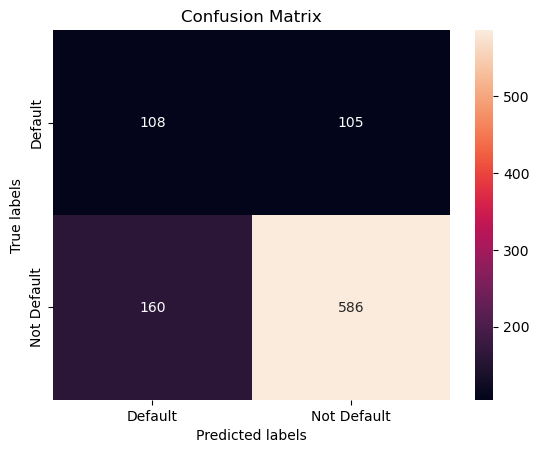

In [89]:
cm = metrics.confusion_matrix(y_outcome_test, prediction_outcome)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Default', 'Not Default']); ax.yaxis.set_ticklabels(['Default', 'Not Default']);

In [90]:
print(classification_report(y_outcome_test, prediction_outcome))

              precision    recall  f1-score   support

     Default       0.40      0.51      0.45       213
 Not Default       0.85      0.79      0.82       746

    accuracy                           0.72       959
   macro avg       0.63      0.65      0.63       959
weighted avg       0.75      0.72      0.73       959



The provided text appears to be a classification report showing the performance metrics of a model for predicting default and non-default financial statements in a bank. Here's a breakdown of the information:

The metrics reported are:

**Precision:** It measures the proportion of correctly predicted instances of a class out of all instances predicted as that class.

- Precision for the Default class is 0.40, meaning 40% of instances predicted as default were actually correct.
- Precision for the Not Default class is 0.85, indicating that 85% of instances predicted as not default were actually correct.
---
- Recall for the Default class is 0.51, suggesting that 51% of the actual default instances were correctly identified.
- Recall for the Not Default class is 0.79, indicating that 79% of the actual non-default instances were correctly identified.
---
F1-score: It is the harmonic mean of precision and recall, providing a balance between the two metrics.
- The Default class has an F1-score of 0.45, indicating the model's performance in capturing both precision and recall for the default class.
- The Not Default class has an F1-score of 0.82, showing a better balance between precision and recall for the non-default class.

Accuracy: The model achieved an overall accuracy of 0.72, meaning it correctly predicted 72% of the instances.

**Overall, the model is not very reliable at predicting Default instances, thus, I am going to proceed to make an improved model based on a new variable called Class, which summarizes the financial behavior of each type of client**

## **Predicting Client Class**

In [91]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Defining Independent and Dependent Variables

# Select only numerical variables
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
x_class= df[numerical_columns]
x_class = x_class.drop('Outcome_ID', axis=1)
y_class = df['class']

# Train Test Split with Independent and Dependent Variables and Test size of 20%
x_class_train, x_class_test, y_class_train, y_class_test = train_test_split(x_class, y_class, test_size=0.4, random_state=2)

# Balancing classes 'S', 'A', 'B', 'C' before training the model
smote = SMOTE(random_state=2)
x_class_train_sm, y_class_train_sm = smote.fit_resample(x_class_train, y_class_train)

# Using the Decision Tree Classifier machine learning algorithm
tree_class = DecisionTreeClassifier()

# Fitting the balanced training data to the model
model_class = tree_class.fit(x_class_train_sm, y_class_train_sm)

# Cross validation to ensure not overfitting
cv_scores = cross_val_score(model_class, x_class_train_sm, y_class_train_sm, cv=10)

# Predicting the target variable for the test data
prediction_class = model_class.predict(x_class_test)

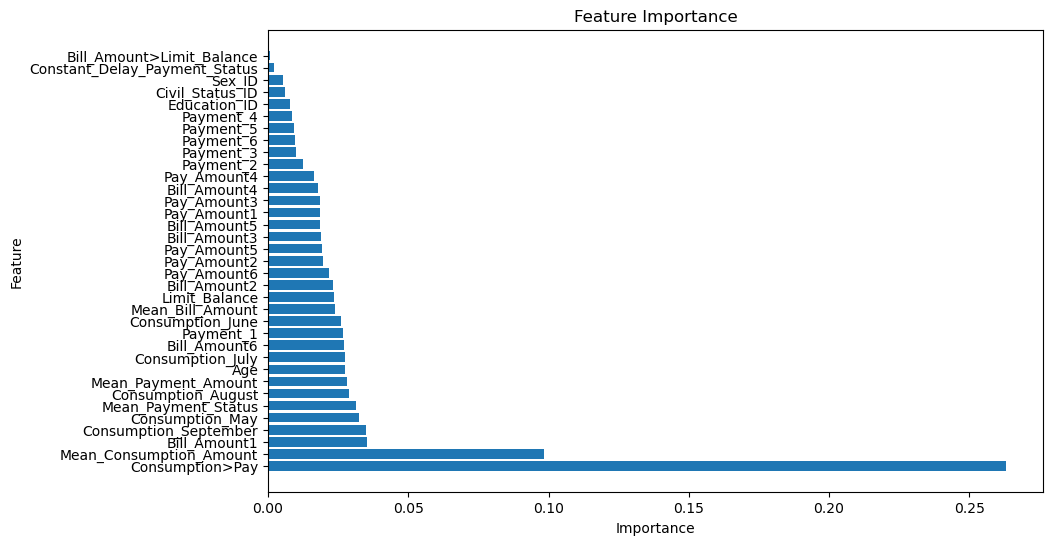

                          Feature  Importance
32                Consumption>Pay        0.26
31        Mean_Consumption_Amount        0.10
11                   Bill_Amount1        0.04
26          Consumption_September        0.04
30                Consumption_May        0.03
25            Mean_Payment_Status        0.03
27             Consumption_August        0.03
23            Mean_Payment_Amount        0.03
3                             Age        0.03
28               Consumption_July        0.03
16                   Bill_Amount6        0.03
5                       Payment_1        0.03
29               Consumption_June        0.03
24               Mean_Bill_Amount        0.02
4                   Limit_Balance        0.02
12                   Bill_Amount2        0.02
22                    Pay_Amount6        0.02
18                    Pay_Amount2        0.02
21                    Pay_Amount5        0.02
13                   Bill_Amount3        0.02
15                   Bill_Amount5 

In [92]:
from sklearn.ensemble import RandomForestClassifier

# Select only numerical variables
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
x_class= df[numerical_columns]
y_class = df['class']

# Remove the 'Outcome' column
x_class = x_class.drop('Outcome_ID', axis=1)

# Initializing the Random Forest classifier
rf = RandomForestClassifier()
rf.fit(x_class, y_class)
importances = rf.feature_importances_

feature_importances = pd.DataFrame({'Feature': x_class.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Printing the feature importances
print(feature_importances)

**Feature Selection**

In [93]:
from sklearn.feature_selection import RFE

# Create the RFE object and specify the model and the number of desired features
rfe = RFE(estimator=tree_class, n_features_to_select=4)

# Perform feature selection
x_class_train_selected = rfe.fit_transform(x_class_train_sm, y_class_train_sm)

# Get the selected features
selected_features = x_class_train.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Bill_Amount1', 'Mean_Payment_Status', 'Mean_Consumption_Amount',
       'Consumption>Pay'],
      dtype='object')


**These are the three most statistical significant variables to predict class. After comibining these, I have found that  Mean_Payment_Status,'Mean_Consumption_Amount', and 'Consumption>Pay' are the best predictors to predict class.**

---

**By using these three predictos, the model's complexity has reduced by far and we have reduced greatly multicolinearity**

In [94]:
import lazypredict

In [95]:
df

,Outcome,Outcome_ID,Sex,Sex_ID,Education,Education_ID,Civil_Status,Civil_Status_ID,Age,Limit_Balance,...,Mean_Consumption_Amount,Consumption>Pay,Bill_Amount>Limit_Balance,Constant_Delay_Payment_Status,class,class_A,class_C,class_D,class_E,class_S
0,Default,1,Female,0,University,3,Married,1,24,20000.00,...,-644.80,0,0,0,C,0,1,0,0,0
1,Default,1,Female,0,University,3,Single,2,26,120000.00,...,715.80,0,0,0,C,0,1,0,0,0
2,Not Default,0,Female,0,University,3,Single,2,34,90000.00,...,-1534.40,0,0,0,A,1,0,0,0,0
3,Not Default,0,Female,0,University,3,Married,1,37,50000.00,...,-2011.00,0,0,0,A,1,0,0,0,0
4,Not Default,0,Male,1,University,3,Married,1,57,50000.00,...,13776.80,1,0,0,S,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,Default,1,Male,1,High School,1,Married,1,32,50000.00,...,3054.20,1,0,0,E,0,0,0,1,0
2392,Not Default,0,Female,0,High School,1,Single,2,49,20000.00,...,-749.00,0,0,0,A,1,0,0,0,0
2393,Not Default,0,Female,0,University,3,Single,2,24,130000.00,...,1251.80,1,0,0,S,0,0,0,0,1
2394,Not Default,0,Female,0,High School,1,Married,1,27,110000.00,...,-653.80,0,0,0,A,1,0,0,0,0


In [96]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

# Defining Independent and Dependent Variables
x_class = df[['Mean_Payment_Status', 'Bill_Amount>Limit_Balance', 'Consumption>Pay']]
y_class = df['class']

# Train Test Split with Independent and Dependent Variables and Test size of 50%
x_class_train, x_class_test, y_class_train, y_class_test = train_test_split(x_class, y_class, test_size=0.5, random_state=2)

# Balancing classes 'S', 'A', 'B', 'C' before training the model
smote = SMOTE(random_state=2)
x_class_train_sm, y_class_train_sm = smote.fit_resample(x_class_train, y_class_train)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = clf.fit(x_class_train_sm, x_class_test, y_class_train_sm, y_class_test)
models

100%|███████████████████████████████████████████| 29/29 [00:02<00:00, 10.57it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelSpreading,0.72,0.68,None,0.73,0.25
LabelPropagation,0.72,0.68,None,0.73,0.16
LGBMClassifier,0.68,0.67,None,0.70,0.32
RandomForestClassifier,0.68,0.67,None,0.70,0.12
BaggingClassifier,0.70,0.67,None,0.71,0.02
DecisionTreeClassifier,0.69,0.67,None,0.70,0.01
ExtraTreeClassifier,0.69,0.67,None,0.70,0.01
ExtraTreesClassifier,0.69,0.67,None,0.70,0.11
SVC,0.74,0.65,None,0.73,0.13


In [97]:
from sklearn.ensemble import RandomForestClassifier
# Using the Decision Tree Classifier machine learning algorithm
tree_class = RandomForestClassifier()

# Fitting the balanced training data to the model
model_class = tree_class.fit(x_class_train_sm, y_class_train_sm)

# Cross validation to ensure not overfitting
cv_scores = cross_val_score(model_class, x_class_train_sm, y_class_train_sm, cv=10)

# Predicting the target variable for the test data
prediction_class = model_class.predict(x_class_test)

### **Client Class Classification Report -  Accuracy, Recall, Precision, and F1- Score**

In [98]:
print(classification_report(y_class_test, prediction_class))

              precision    recall  f1-score   support

           A       0.85      0.74      0.79       573
           C       0.27      0.38      0.32       127
           D       0.37      0.47      0.41       106
           E       0.53      1.00      0.69        27
           S       0.84      0.79      0.81       365

    accuracy                           0.70      1198
   macro avg       0.57      0.67      0.61      1198
weighted avg       0.74      0.70      0.71      1198



Where: 

**Not Default Clients**
    
- S for super Clients: Consume less than what they pay / Not Default / Payment on Time

- A Clients:Consume more than what they pay / Not Default 

---

**Default Clients**

- C Clients: Consume less than what they pay / Default

- D Clients: Default / Delay on Payment Time

- E Clients: Consume more than what they pay / Default / Delay on Payment Time

From a bank's perspective, this classification model can be useful for new clients in the following ways:

- **Risk Assessment:** The model can help assess the risk level associated with new clients based on their payment behavior and consumption patterns. It can provide insights into whether a client is likely to default, make timely payments, or have a balanced payment-consumption ratio.
---
**Credit Limit Decisions:** The model's predictions can assist in determining appropriate credit limits for new clients. By categorizing clients into different classes, the bank can make informed decisions about setting credit limits that align with the client's risk profile and financial behavior.

---
**Tailored Services:** The model's predictions can inform the bank about the type of services, offers, or incentives that might be suitable for different client segments. This can help in providing personalized experiences and targeted financial solutions to new clients.

---

**It is important to minimize recall for default clients because identifying and flagging default risks accurately is crucial for the bank's risk management.** Defaulting clients pose a significant financial risk to the bank, and early detection is vital to take appropriate actions such as implementing debt recovery measures, adjusting credit limits, or offering financial assistance to mitigate the potential losses.

# **Conclusions**

**Client Classification Reward System:** Measures for existing clients: 

**S Clients will have their Limit Balance increased by 25%:**
- **Reason:** Super clients are considered low-risk clients who consume less than what they pay and make their payments on time. Increasing their limit balance rewards their responsible behavior and provides them with more flexibility to manage their finances. This measure can enhance their satisfaction and loyalty, potentially leading to increased customer retention and positive word-of-mouth.
---

**A Clients will have their Limit Balance increased by 10%:**


- **Reason:** A clients are not default clients, but they consume more than what they pay. By increasing their limit balance, the bank can provide them with a slightly higher credit limit to better accommodate their spending patterns. This measure aims to strike a balance between meeting their credit needs while mitigating the risk associated with their higher consumption.

---
---

**C Clients will have their Limit Balance decreased by 25%:**

- **Reason:** C clients are default clients who consume less than what they pay. Decreasing their limit balance reduces their credit exposure, helping the bank mitigate potential losses associated with their default status. It also serves as a risk management measure to align their credit limit with their ability to repay.

---


**D Clients will have their Limit Balance decreased by 50% and an increase in pay time of 3 months:**
- **Reason:** D clients are default clients who not only consume more than what they pay but also have a delay in payment time. The proposed measure aims to reduce their credit limit significantly to minimize the bank's risk exposure. Additionally, increasing the pay time provides them with a longer period to fulfill their payment obligations, potentially improving their chances of repayment and reducing the likelihood of further default.

---

**E Clients will have their Limit Balance decreased by 75%:**

- **Reason:** E clients are default clients who consume more than what they pay and have a delay in payment time. They represent a higher level of credit risk for the bank. By reducing their limit balance significantly, the bank can limit their credit utilization and exposure. This measure helps protect the bank from potential losses associated with their default status and reinforces risk management practices.
Overall, the proposed measures aim to align the credit limits of different client segments with their credit behavior, risk profiles, and ability to repay. By adjusting the limit balance based on these factors, the bank can optimize its risk exposure, minimize default rates, and maintain a healthy lending portfolio.

In [99]:
import pandas as pd

# Define the measures
measures = {
    'S': 0.25,  # Increase by 25%
    'A': 0.10,  # Increase by 10%
    'C': -0.25,  # Decrease by 25%
    'D': -0.50,  # Decrease by 50%
    'E': -0.75  # Decrease by 75%
}

# Apply the measures to the Limit_Balance column
df['Limit_Balance_After'] = df.apply(lambda row: row['Limit_Balance'] * (1 + measures[row['class']]), axis=1)

# Calculate the total sum of Limit_Balance before and after the measures for each class
sum_before = df.groupby('class')['Limit_Balance'].sum()
sum_after = df.groupby('class')['Limit_Balance_After'].sum()

# Display the total sums
print("Total Limit_Balance before the measures:")
print(sum_before)
print()
print("Total Limit_Balance after applying the measures:")
print(sum_after)

# Calculate the total sum of Limit_Balance before and after the measures
total_sum_before = df['Limit_Balance'].sum()
total_sum_after = df['Limit_Balance_After'].sum()

# Display the total sums
print("Total Limit_Balance before the measures:", total_sum_before)
print("Total Limit_Balance after applying the measures:", total_sum_after)

total_sum_before = 397340000.0
total_sum_after = 418538500.0

percentage_increase = ((total_sum_after - total_sum_before) / total_sum_before) * 100

print("Total percentage increase: {:.2f}%".format(percentage_increase))



Total Limit_Balance before the measures:
class
A   194510000.00
C    36300000.00
D    32720000.00
E     6270000.00
S   127540000.00
Name: Limit_Balance, dtype: float64

Total Limit_Balance after applying the measures:
class
A   213961000.00
C    27225000.00
D    16360000.00
E     1567500.00
S   159425000.00
Name: Limit_Balance_After, dtype: float64
Total Limit_Balance before the measures: 397340000.0
Total Limit_Balance after applying the measures: 418538500.0
Total percentage increase: 5.34%


From a financial point of view, assessing risk and reward after applying the measures, the bank has achieved the following:


- **Total Limit_Balance before the measures: 397,340,000.0**
This represents the total credit limit across all classes before the measures were applied.

- **Total Limit_Balance after applying the measures: 418,538,500.0**
This represents the total credit limit across all classes after applying the measures.

By comparing these two totals, we can assess the impact of the measures on the bank's risk and reward:

The total Limit_Balance after applying the measures (418,538,500.0) is higher than the total Limit_Balance before the measures (397,340,000.0). 


---
- This suggests that the bank has increased its overall credit exposure.
- The bank has taken on additional risk by increasing the credit limits for S clients (super clients) and A clients. This indicates a **willingness to reward responsible behavior and provide more credit to low-risk clients who consume less than what they pay and make payments on time.**
- On the other hand, **the bank has decreased the credit limits for C clients, D clients, and E clients. This reduction in credit limits reflects a risk management strategy to mitigate potential losses associated with defaulting and delayed payment behaviors.**

---
- Overall, the bank has taken a calculated approach to manage risk and reward. **By adjusting credit limits based on client behavior and default status, the bank aims to optimize its lending portfolio, minimize default rates, and maintain a healthy balance between risk and profitability.**

**No Demographic Variables (Sex, Civil_Status, Age or Education) are statistically significant to predict wether the client will default**

**The prediction of Client Class and its measures for current clients, give the financial institution a better outcome at assessing risks and rewards regarding the type of clients. Moreover, it offers more insight and an improvement over the Outcome Model, where the predicion of Default Rate was not reliable.**

**This Dataset pertains to a real case scenario of a bank who went bankrupt in Taiwan 2006**, which gives me additional insight on why credits where giving to everyone despite its demographic variables and Payment_History. They went bankrupt. This analysis helps give an alternative of what coulf have been done if additional measures had taken place regarding the **Client Classification Reward System**

By considering the client classification reward system and incorporating it into the credit decision-making process, the financial institution could have made more informed and effective decisions regarding the allocation of credit. This would have contributed to a better risk management approach and potentially avoided the unfortunate outcome of bankruptcy.

Overall, this analysis serves as a valuable lesson and provides an alternative perspective on what could have been done differently to enhance risk assessment and decision-making in relation to the client classification reward system.